In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.style as style
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [3]:
# Loading users dataset to Pandas Dataframe
df_usr = pd.read_csv('D://Springboard/Take Home Challenges/relax_challenge/takehome_users.csv', encoding='latin-1')
df_usr.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df_usr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
df_usr['creation_time'] = pd.to_datetime(df_usr['creation_time'])
df_usr['last_session_creation_time'] = pd.to_datetime(df_usr['last_session_creation_time'])

In [6]:
# Loading usage dataset to Pandas Dataframe
df_log = pd.read_csv('D://Springboard/Take Home Challenges/relax_challenge/takehome_user_engagement.csv', encoding='latin-1')
df_log.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
df_log['time_stamp'] = pd.to_datetime(df_log['time_stamp'])

In [9]:
df_log['7_days'] = df_log['time_stamp'] + pd.Timedelta(days=7)
df_log.head()

,time_stamp,user_id,visited,7_days
0,2014-04-22 03:53:30,1,1,2014-04-29 03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-22 03:45:04
2,2013-11-29 03:45:04,2,1,2013-12-06 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-16 03:45:04
4,2013-12-25 03:45:04,2,1,2014-01-01 03:45:04


In [10]:
df_log['user_id'].unique()

array([    1,     2,     3, ..., 11998, 11999, 12000], dtype=int64)

In [11]:
dfs = dict(tuple(df_log.groupby('user_id')))

dfs

{1:            time_stamp  user_id  visited              7_days
 0 2014-04-22 03:53:30        1        1 2014-04-29 03:53:30,
 2:             time_stamp  user_id  visited              7_days
 1  2013-11-15 03:45:04        2        1 2013-11-22 03:45:04
 2  2013-11-29 03:45:04        2        1 2013-12-06 03:45:04
 3  2013-12-09 03:45:04        2        1 2013-12-16 03:45:04
 4  2013-12-25 03:45:04        2        1 2014-01-01 03:45:04
 5  2013-12-31 03:45:04        2        1 2014-01-07 03:45:04
 6  2014-01-08 03:45:04        2        1 2014-01-15 03:45:04
 7  2014-02-03 03:45:04        2        1 2014-02-10 03:45:04
 8  2014-02-08 03:45:04        2        1 2014-02-15 03:45:04
 9  2014-02-09 03:45:04        2        1 2014-02-16 03:45:04
 10 2014-02-13 03:45:04        2        1 2014-02-20 03:45:04
 11 2014-02-16 03:45:04        2        1 2014-02-23 03:45:04
 12 2014-03-09 03:45:04        2        1 2014-03-16 03:45:04
 13 2014-03-13 03:45:04        2        1 2014-03-20 03:45:04
 14

create a new dataframe for each unique user id?
If timestamp < 7 days, add "visited" and move to next row
Repeat until time_stamp > 7 days or sum(visited) >= 3

 

In [12]:
dfs[388]['time_stamp'].iloc[0]

Timestamp('2014-05-23 13:17:30')

In [13]:
dfs

{1:            time_stamp  user_id  visited              7_days
 0 2014-04-22 03:53:30        1        1 2014-04-29 03:53:30,
 2:             time_stamp  user_id  visited              7_days
 1  2013-11-15 03:45:04        2        1 2013-11-22 03:45:04
 2  2013-11-29 03:45:04        2        1 2013-12-06 03:45:04
 3  2013-12-09 03:45:04        2        1 2013-12-16 03:45:04
 4  2013-12-25 03:45:04        2        1 2014-01-01 03:45:04
 5  2013-12-31 03:45:04        2        1 2014-01-07 03:45:04
 6  2014-01-08 03:45:04        2        1 2014-01-15 03:45:04
 7  2014-02-03 03:45:04        2        1 2014-02-10 03:45:04
 8  2014-02-08 03:45:04        2        1 2014-02-15 03:45:04
 9  2014-02-09 03:45:04        2        1 2014-02-16 03:45:04
 10 2014-02-13 03:45:04        2        1 2014-02-20 03:45:04
 11 2014-02-16 03:45:04        2        1 2014-02-23 03:45:04
 12 2014-03-09 03:45:04        2        1 2014-03-16 03:45:04
 13 2014-03-13 03:45:04        2        1 2014-03-20 03:45:04
 14

In [14]:
# a = dfs['time_stamp']
# b = df_2['7_days']
count = 0
j = 0

for key in dfs.keys():
    for i in range(len(dfs[key])):
        if len(dfs[key]) < 3:
            dfs[key]['adopted'] = 0
            j=0
            count=0
            print('too short')
            break
        elif len(dfs[key]) == 3 and dfs[key]['time_stamp'].iloc[2] <= dfs[key]['7_days'].iloc[0]:
            dfs[key]['adopted'] = 1
            j=0
            count=0
            print('3 but not adopted')
            break
        elif len(dfs[key]) == 3 and dfs[key]['time_stamp'].iloc[2] > dfs[key]['7_days'].iloc[0]:
            dfs[key]['adopted'] = 0
            j=0
            count=0
            print('3 but adopted')
            break
        elif dfs[key]['time_stamp'].iloc[i] <= dfs[key]['7_days'].iloc[j] and count < 3 and i < len(dfs[key])-1:
            count += 1
            print(i, dfs[key]['time_stamp'].iloc[i], j, dfs[key]['7_days'].iloc[j], count)
        elif dfs[key]['time_stamp'].iloc[i] <= dfs[key]['7_days'].iloc[j] and count < 3 and i >= len(dfs[key])-1:
            count += 1
            if count >= 3:
                dfs[key]['adopted'] = 1
                print('Sufficient count and adopted on final login')
                j=0
                count=0
                break
            else:
                dfs[key]['adopted'] = 1
                print('Sufficient count but not adopted')
                j=0
                count=0
                break
            break
        elif dfs[key]['time_stamp'].iloc[i] > dfs[key]['7_days'].iloc[j] and count < 3 and i < len(dfs[key])-1:
            count = 1
            j = i
            print(i, dfs[key]['time_stamp'].iloc[i], j, dfs[key]['7_days'].iloc[j], count)
        elif dfs[key]['time_stamp'].iloc[i] > dfs[key]['7_days'].iloc[j] and count < 3 and i >= len(dfs[key])-1:
            dfs[key]['adopted'] = 0
            j=0
            count=0
            print('Sufficient count but not adopted')
            break
        elif count >= 3:
            dfs[key]['adopted'] = 1
            j=0
            count=0
            print('Sufficient count and adopted')
            break
        else:
            dfs[key]['adopted'] = 0
            j=0
            count=0
            print('Not adopted')
            break
        

too short
0 2013-11-15 03:45:04 0 2013-11-22 03:45:04 1
1 2013-11-29 03:45:04 1 2013-12-06 03:45:04 1
2 2013-12-09 03:45:04 2 2013-12-16 03:45:04 1
3 2013-12-25 03:45:04 3 2014-01-01 03:45:04 1
4 2013-12-31 03:45:04 3 2014-01-01 03:45:04 2
5 2014-01-08 03:45:04 5 2014-01-15 03:45:04 1
6 2014-02-03 03:45:04 6 2014-02-10 03:45:04 1
7 2014-02-08 03:45:04 6 2014-02-10 03:45:04 2
8 2014-02-09 03:45:04 6 2014-02-10 03:45:04 3
Sufficient count and adopted
too short
too short
too short
too short
too short
0 2013-01-16 22:08:03 0 2013-01-23 22:08:03 1
1 2013-01-22 22:08:03 0 2013-01-23 22:08:03 2
2 2013-01-30 22:08:03 2 2013-02-06 22:08:03 1
3 2013-02-04 22:08:03 2 2013-02-06 22:08:03 2
4 2013-02-06 22:08:03 2 2013-02-06 22:08:03 3
Sufficient count and adopted
too short
too short
too short
too short
too short
0 2014-03-11 11:46:38 0 2014-03-18 11:46:38 1
1 2014-03-12 11:46:38 0 2014-03-18 11:46:38 2
2 2014-03-13 11:46:38 0 2014-03-18 11:46:38 3
Sufficient count and adopted
too short
too short
t

2 2014-06-02 21:56:06 2 2014-06-09 21:56:06 1
Sufficient count but not adopted
too short
too short
too short
too short
too short
too short
0 2013-03-22 22:47:50 0 2013-03-29 22:47:50 1
1 2013-04-29 22:47:50 1 2013-05-06 22:47:50 1
2 2013-05-19 22:47:50 2 2013-05-26 22:47:50 1
3 2013-05-25 22:47:50 2 2013-05-26 22:47:50 2
4 2013-05-26 22:47:50 2 2013-05-26 22:47:50 3
Sufficient count and adopted
too short
too short
too short
too short
too short
too short
too short
too short
3 but adopted
too short
too short
too short
0 2013-06-02 10:29:08 0 2013-06-09 10:29:08 1
1 2013-07-02 10:29:08 1 2013-07-09 10:29:08 1
2 2013-07-14 10:29:08 2 2013-07-21 10:29:08 1
3 2013-07-25 10:29:08 3 2013-08-01 10:29:08 1
4 2013-08-01 10:29:08 3 2013-08-01 10:29:08 2
5 2013-08-06 10:29:08 5 2013-08-13 10:29:08 1
6 2013-08-07 10:29:08 5 2013-08-13 10:29:08 2
7 2013-08-10 10:29:08 5 2013-08-13 10:29:08 3
Sufficient count and adopted
too short
0 2013-09-13 15:47:48 0 2013-09-20 15:47:48 1
1 2013-09-19 15:47:48 0 2

too short
too short
0 2012-07-24 03:26:27 0 2012-07-31 03:26:27 1
1 2012-07-29 03:26:27 0 2012-07-31 03:26:27 2
2 2012-08-12 03:26:27 2 2012-08-19 03:26:27 1
3 2012-08-13 03:26:27 2 2012-08-19 03:26:27 2
4 2012-08-25 03:26:27 4 2012-09-01 03:26:27 1
5 2012-08-29 03:26:27 4 2012-09-01 03:26:27 2
6 2012-09-24 03:26:27 6 2012-10-01 03:26:27 1
7 2012-09-25 03:26:27 6 2012-10-01 03:26:27 2
8 2012-09-27 03:26:27 6 2012-10-01 03:26:27 3
Sufficient count and adopted
too short
too short
too short
0 2012-12-05 19:18:01 0 2012-12-12 19:18:01 1
1 2012-12-13 19:18:01 1 2012-12-20 19:18:01 1
2 2012-12-26 19:18:01 2 2013-01-02 19:18:01 1
3 2013-01-02 19:18:01 2 2013-01-02 19:18:01 2
4 2013-01-05 19:18:01 4 2013-01-12 19:18:01 1
5 2013-01-10 19:18:01 4 2013-01-12 19:18:01 2
6 2013-01-14 19:18:01 6 2013-01-21 19:18:01 1
7 2013-01-15 19:18:01 6 2013-01-21 19:18:01 2
8 2013-01-16 19:18:01 6 2013-01-21 19:18:01 3
Sufficient count and adopted
too short
too short
too short
3 but adopted
too short
0 2012-12-

3 2013-12-14 11:57:29 3 2013-12-21 11:57:29 1
Sufficient count but not adopted
0 2012-08-10 06:32:26 0 2012-08-17 06:32:26 1
1 2012-08-20 06:32:26 1 2012-08-27 06:32:26 1
2 2012-08-21 06:32:26 1 2012-08-27 06:32:26 2
Sufficient count but not adopted
too short
too short
too short
too short
too short
0 2014-02-25 07:36:13 0 2014-03-04 07:36:13 1
1 2014-02-26 07:36:13 0 2014-03-04 07:36:13 2
2 2014-03-12 07:36:13 2 2014-03-19 07:36:13 1
Sufficient count but not adopted
0 2013-06-16 18:05:40 0 2013-06-23 18:05:40 1
1 2013-07-10 18:05:40 1 2013-07-17 18:05:40 1
2 2013-07-18 18:05:40 2 2013-07-25 18:05:40 1
3 2013-07-21 18:05:40 2 2013-07-25 18:05:40 2
4 2013-07-29 18:05:40 4 2013-08-05 18:05:40 1
5 2013-08-01 18:05:40 4 2013-08-05 18:05:40 2
6 2013-08-05 18:05:40 4 2013-08-05 18:05:40 3
Sufficient count and adopted
too short
too short
too short
too short
too short
0 2014-04-17 16:08:31 0 2014-04-24 16:08:31 1
1 2014-04-18 16:08:31 0 2014-04-24 16:08:31 2
2 2014-04-23 16:08:31 0 2014-04-24 1

too short
too short
too short
too short
too short
0 2013-09-09 21:15:07 0 2013-09-16 21:15:07 1
1 2013-09-13 21:15:07 0 2013-09-16 21:15:07 2
2 2013-10-09 21:15:07 2 2013-10-16 21:15:07 1
3 2013-10-10 21:15:07 2 2013-10-16 21:15:07 2
4 2013-11-01 21:15:07 4 2013-11-08 21:15:07 1
5 2013-11-05 21:15:07 4 2013-11-08 21:15:07 2
6 2013-11-08 21:15:07 4 2013-11-08 21:15:07 3
Sufficient count and adopted
too short
0 2013-02-26 12:35:23 0 2013-03-05 12:35:23 1
1 2013-03-07 12:35:23 1 2013-03-14 12:35:23 1
2 2013-03-11 12:35:23 1 2013-03-14 12:35:23 2
3 2013-03-19 12:35:23 3 2013-03-26 12:35:23 1
4 2013-03-20 12:35:23 3 2013-03-26 12:35:23 2
5 2013-03-22 12:35:23 3 2013-03-26 12:35:23 3
Sufficient count and adopted
too short
0 2013-03-15 08:30:30 0 2013-03-22 08:30:30 1
1 2013-03-28 08:30:30 1 2013-04-04 08:30:30 1
2 2013-04-09 08:30:30 2 2013-04-16 08:30:30 1
Sufficient count but not adopted
too short
too short
too short
too short
too short
too short
too short
0 2013-02-06 17:27:22 0 2013-02-1

7 2013-02-01 08:10:26 6 2013-02-07 08:10:26 2
8 2013-02-02 08:10:26 6 2013-02-07 08:10:26 3
Sufficient count and adopted
0 2013-06-20 23:51:48 0 2013-06-27 23:51:48 1
1 2013-07-04 23:51:48 1 2013-07-11 23:51:48 1
2 2013-08-08 23:51:48 2 2013-08-15 23:51:48 1
Sufficient count but not adopted
too short
0 2013-07-12 19:41:40 0 2013-07-19 19:41:40 1
1 2013-07-25 19:41:40 1 2013-08-01 19:41:40 1
2 2013-07-26 19:41:40 1 2013-08-01 19:41:40 2
3 2013-09-11 19:41:40 3 2013-09-18 19:41:40 1
4 2013-10-09 19:41:40 4 2013-10-16 19:41:40 1
5 2013-10-10 19:41:40 4 2013-10-16 19:41:40 2
6 2013-11-03 19:41:40 6 2013-11-10 19:41:40 1
7 2013-11-04 19:41:40 6 2013-11-10 19:41:40 2
8 2013-11-05 19:41:40 6 2013-11-10 19:41:40 3
Sufficient count and adopted
0 2013-03-19 03:41:50 0 2013-03-26 03:41:50 1
1 2013-03-23 03:41:50 0 2013-03-26 03:41:50 2
2 2013-03-29 03:41:50 2 2013-04-05 03:41:50 1
3 2013-04-11 03:41:50 3 2013-04-18 03:41:50 1
4 2013-04-20 03:41:50 4 2013-04-27 03:41:50 1
5 2013-04-22 03:41:50 4 2

1 2013-07-24 18:42:30 1 2013-07-31 18:42:30 1
2 2013-07-27 18:42:30 1 2013-07-31 18:42:30 2
3 2013-08-01 18:42:30 3 2013-08-08 18:42:30 1
4 2013-08-04 18:42:30 3 2013-08-08 18:42:30 2
5 2013-09-06 18:42:30 5 2013-09-13 18:42:30 1
6 2013-09-11 18:42:30 5 2013-09-13 18:42:30 2
7 2013-09-13 18:42:30 5 2013-09-13 18:42:30 3
Sufficient count and adopted
too short
too short
too short
too short
too short
0 2013-04-29 07:43:26 0 2013-05-06 07:43:26 1
1 2013-05-09 07:43:26 1 2013-05-16 07:43:26 1
2 2013-05-27 07:43:26 2 2013-06-03 07:43:26 1
3 2013-06-11 07:43:26 3 2013-06-18 07:43:26 1
4 2013-06-21 07:43:26 4 2013-06-28 07:43:26 1
5 2013-07-02 07:43:26 5 2013-07-09 07:43:26 1
6 2013-07-25 07:43:26 6 2013-08-01 07:43:26 1
7 2013-07-26 07:43:26 6 2013-08-01 07:43:26 2
8 2013-07-27 07:43:26 6 2013-08-01 07:43:26 3
Sufficient count and adopted
too short
too short
too short
0 2013-10-04 17:54:26 0 2013-10-11 17:54:26 1
1 2013-11-05 17:54:26 1 2013-11-12 17:54:26 1
2 2013-11-12 17:54:26 1 2013-11-12

1 2012-07-06 05:39:42 0 2012-07-12 05:39:42 2
2 2012-07-15 05:39:42 2 2012-07-22 05:39:42 1
3 2012-07-27 05:39:42 3 2012-08-03 05:39:42 1
4 2012-08-07 05:39:42 4 2012-08-14 05:39:42 1
Sufficient count but not adopted
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
0 2012-12-03 18:48:20 0 2012-12-10 18:48:20 1
1 2012-12-08 18:48:20 0 2012-12-10 18:48:20 2
2 2012-12-15 18:48:20 2 2012-12-22 18:48:20 1
3 2013-01-09 18:48:20 3 2013-01-16 18:48:20 1
4 2013-01-13 18:48:20 3 2013-01-16 18:48:20 2
5 2013-01-17 18:48:20 5 2013-01-24 18:48:20 1
6 2013-01-27 18:48:20 6 2013-02-03 18:48:20 1
7 2013-01-30 18:48:20 6 2013-02-03 18:48:20 2
8 2013-02-01 18:48:20 6 2013-02-03 18:48:20 3
Sufficient count and adopted
too short
too short
0 2014-03-13 02:44:23 0 2014-03-20 02:44:23 1
1 2014-04-04 02:44:23 1 2014-04-11 02:44:23 1
2 2014-04-28 02:44:23 2 2014-05-05 02:44:23 1
3 2014-05-05 02:44:23 2 2014-05-05 02:44:23 2
4 2014-05-06 02:

too short
0 2014-03-02 06:16:29 0 2014-03-09 06:16:29 1
1 2014-03-30 06:16:29 1 2014-04-06 06:16:29 1
2 2014-04-24 06:16:29 2 2014-05-01 06:16:29 1
3 2014-04-29 06:16:29 2 2014-05-01 06:16:29 2
4 2014-04-30 06:16:29 2 2014-05-01 06:16:29 3
Sufficient count and adopted
too short
too short
too short
0 2013-07-03 01:10:22 0 2013-07-10 01:10:22 1
1 2013-07-18 01:10:22 1 2013-07-25 01:10:22 1
2 2013-07-26 01:10:22 2 2013-08-02 01:10:22 1
3 2013-08-05 01:10:22 3 2013-08-12 01:10:22 1
4 2013-08-10 01:10:22 3 2013-08-12 01:10:22 2
5 2013-08-11 01:10:22 3 2013-08-12 01:10:22 3
Sufficient count and adopted
0 2013-01-26 18:44:04 0 2013-02-02 18:44:04 1
1 2013-02-08 18:44:04 1 2013-02-15 18:44:04 1
2 2013-02-12 18:44:04 1 2013-02-15 18:44:04 2
3 2013-03-10 18:44:04 3 2013-03-17 18:44:04 1
4 2013-03-11 18:44:04 3 2013-03-17 18:44:04 2
5 2013-03-13 18:44:04 3 2013-03-17 18:44:04 3
Sufficient count and adopted
0 2012-08-07 11:59:51 0 2012-08-14 11:59:51 1
1 2012-09-04 11:59:51 1 2012-09-11 11:59:51 1

Sufficient count and adopted
too short
too short
too short
0 2013-10-23 13:51:18 0 2013-10-30 13:51:18 1
1 2013-11-05 13:51:18 1 2013-11-12 13:51:18 1
2 2013-11-23 13:51:18 2 2013-11-30 13:51:18 1
3 2013-11-24 13:51:18 2 2013-11-30 13:51:18 2
4 2013-11-26 13:51:18 2 2013-11-30 13:51:18 3
Sufficient count and adopted
too short
too short
3 but adopted
too short
too short
too short
too short
too short
0 2013-06-15 13:16:45 0 2013-06-22 13:16:45 1
1 2013-06-27 13:16:45 1 2013-07-04 13:16:45 1
2 2013-07-14 13:16:45 2 2013-07-21 13:16:45 1
3 2013-07-16 13:16:45 2 2013-07-21 13:16:45 2
4 2013-07-23 13:16:45 4 2013-07-30 13:16:45 1
5 2013-07-24 13:16:45 4 2013-07-30 13:16:45 2
6 2013-07-29 13:16:45 4 2013-07-30 13:16:45 3
Sufficient count and adopted
0 2013-01-16 16:44:04 0 2013-01-23 16:44:04 1
1 2013-01-17 16:44:04 0 2013-01-23 16:44:04 2
2 2013-01-19 16:44:04 0 2013-01-23 16:44:04 3
Sufficient count and adopted
too short
too short
too short
0 2012-07-05 06:19:34 0 2012-07-12 06:19:34 1
1 20

1 2013-11-03 07:19:26 1 2013-11-10 07:19:26 1
2 2013-11-06 07:19:26 1 2013-11-10 07:19:26 2
3 2013-11-09 07:19:26 1 2013-11-10 07:19:26 3
Sufficient count and adopted
too short
0 2012-06-16 16:02:39 0 2012-06-23 16:02:39 1
1 2012-07-15 16:02:39 1 2012-07-22 16:02:39 1
2 2012-07-27 16:02:39 2 2012-08-03 16:02:39 1
3 2012-07-31 16:02:39 2 2012-08-03 16:02:39 2
4 2012-08-06 16:02:39 4 2012-08-13 16:02:39 1
5 2012-08-24 16:02:39 5 2012-08-31 16:02:39 1
6 2012-08-26 16:02:39 5 2012-08-31 16:02:39 2
7 2012-09-01 16:02:39 7 2012-09-08 16:02:39 1
8 2012-09-03 16:02:39 7 2012-09-08 16:02:39 2
9 2012-09-05 16:02:39 7 2012-09-08 16:02:39 3
Sufficient count and adopted
too short
too short
too short
too short
too short
0 2013-08-25 14:26:52 0 2013-09-01 14:26:52 1
1 2013-10-06 14:26:52 1 2013-10-13 14:26:52 1
2 2013-10-10 14:26:52 1 2013-10-13 14:26:52 2
3 2013-10-17 14:26:52 3 2013-10-24 14:26:52 1
4 2013-10-24 14:26:52 3 2013-10-24 14:26:52 2
5 2013-10-25 14:26:52 5 2013-11-01 14:26:52 1
6 2013-1

5 2013-04-09 13:18:11 4 2013-04-14 13:18:11 2
6 2013-04-10 13:18:11 4 2013-04-14 13:18:11 3
Sufficient count and adopted
too short
0 2012-06-03 16:44:54 0 2012-06-10 16:44:54 1
1 2012-06-05 16:44:54 0 2012-06-10 16:44:54 2
2 2012-07-01 16:44:54 2 2012-07-08 16:44:54 1
3 2012-07-06 16:44:54 2 2012-07-08 16:44:54 2
4 2012-07-08 16:44:54 2 2012-07-08 16:44:54 3
Sufficient count and adopted
0 2014-04-20 06:37:53 0 2014-04-27 06:37:53 1
1 2014-05-19 06:37:53 1 2014-05-26 06:37:53 1
2 2014-05-20 06:37:53 1 2014-05-26 06:37:53 2
3 2014-05-21 06:37:53 1 2014-05-26 06:37:53 3
Sufficient count and adopted
0 2013-08-25 10:47:20 0 2013-09-01 10:47:20 1
1 2013-09-13 10:47:20 1 2013-09-20 10:47:20 1
2 2013-10-02 10:47:20 2 2013-10-09 10:47:20 1
3 2013-10-05 10:47:20 2 2013-10-09 10:47:20 2
4 2013-10-24 10:47:20 4 2013-10-31 10:47:20 1
5 2013-10-25 10:47:20 4 2013-10-31 10:47:20 2
6 2013-10-31 10:47:20 4 2013-10-31 10:47:20 3
Sufficient count and adopted
0 2013-03-21 04:09:52 0 2013-03-28 04:09:52 1


4 2014-05-09 01:30:28 4 2014-05-16 01:30:28 1
Sufficient count but not adopted
too short
too short
too short
too short
too short
3 but adopted
too short
too short
0 2013-10-23 23:30:06 0 2013-10-30 23:30:06 1
1 2013-11-11 23:30:06 1 2013-11-18 23:30:06 1
2 2013-11-20 23:30:06 2 2013-11-27 23:30:06 1
3 2013-11-25 23:30:06 2 2013-11-27 23:30:06 2
4 2013-11-28 23:30:06 4 2013-12-05 23:30:06 1
5 2013-12-01 23:30:06 4 2013-12-05 23:30:06 2
6 2013-12-12 23:30:06 6 2013-12-19 23:30:06 1
7 2013-12-20 23:30:06 7 2013-12-27 23:30:06 1
8 2013-12-23 23:30:06 7 2013-12-27 23:30:06 2
9 2013-12-27 23:30:06 7 2013-12-27 23:30:06 3
Sufficient count and adopted
too short
too short
0 2013-12-06 04:07:08 0 2013-12-13 04:07:08 1
1 2013-12-13 04:07:08 0 2013-12-13 04:07:08 2
2 2014-01-11 04:07:08 2 2014-01-18 04:07:08 1
3 2014-01-26 04:07:08 3 2014-02-02 04:07:08 1
4 2014-01-28 04:07:08 3 2014-02-02 04:07:08 2
5 2014-01-30 04:07:08 3 2014-02-02 04:07:08 3
Sufficient count and adopted
too short
0 2013-08-22 

5 2013-09-27 16:58:57 5 2013-10-04 16:58:57 1
6 2013-09-28 16:58:57 5 2013-10-04 16:58:57 2
7 2013-09-29 16:58:57 5 2013-10-04 16:58:57 3
Sufficient count and adopted
too short
too short
too short
0 2014-03-16 01:01:57 0 2014-03-23 01:01:57 1
1 2014-04-08 01:01:57 1 2014-04-15 01:01:57 1
2 2014-04-14 01:01:57 1 2014-04-15 01:01:57 2
3 2014-04-17 01:01:57 3 2014-04-24 01:01:57 1
4 2014-04-21 01:01:57 3 2014-04-24 01:01:57 2
5 2014-04-23 01:01:57 3 2014-04-24 01:01:57 3
Sufficient count and adopted
too short
too short
0 2013-11-17 07:06:09 0 2013-11-24 07:06:09 1
1 2013-11-18 07:06:09 0 2013-11-24 07:06:09 2
2 2013-12-12 07:06:09 2 2013-12-19 07:06:09 1
3 2013-12-16 07:06:09 2 2013-12-19 07:06:09 2
4 2013-12-27 07:06:09 4 2014-01-03 07:06:09 1
5 2013-12-30 07:06:09 4 2014-01-03 07:06:09 2
6 2013-12-31 07:06:09 4 2014-01-03 07:06:09 3
Sufficient count and adopted
too short
too short
too short
0 2012-07-25 18:39:55 0 2012-08-01 18:39:55 1
1 2012-08-10 18:39:55 1 2012-08-17 18:39:55 1
2 201

3 but not adopted
0 2012-09-19 04:55:39 0 2012-09-26 04:55:39 1
1 2012-09-26 04:55:39 0 2012-09-26 04:55:39 2
2 2012-09-28 04:55:39 2 2012-10-05 04:55:39 1
3 2012-10-02 04:55:39 2 2012-10-05 04:55:39 2
4 2012-10-09 04:55:39 4 2012-10-16 04:55:39 1
5 2012-10-10 04:55:39 4 2012-10-16 04:55:39 2
6 2012-10-12 04:55:39 4 2012-10-16 04:55:39 3
Sufficient count and adopted
too short
too short
too short
too short
0 2013-04-18 20:43:01 0 2013-04-25 20:43:01 1
1 2013-04-25 20:43:01 0 2013-04-25 20:43:01 2
2 2013-05-04 20:43:01 2 2013-05-11 20:43:01 1
3 2013-05-11 20:43:01 2 2013-05-11 20:43:01 2
4 2013-05-12 20:43:01 4 2013-05-19 20:43:01 1
5 2013-05-15 20:43:01 4 2013-05-19 20:43:01 2
6 2013-05-21 20:43:01 6 2013-05-28 20:43:01 1
7 2013-05-28 20:43:01 6 2013-05-28 20:43:01 2
8 2013-06-16 20:43:01 8 2013-06-23 20:43:01 1
9 2013-06-27 20:43:01 9 2013-07-04 20:43:01 1
10 2013-07-11 20:43:01 10 2013-07-18 20:43:01 1
11 2013-07-15 20:43:01 10 2013-07-18 20:43:01 2
12 2013-07-16 20:43:01 10 2013-07-1

too short
0 2013-06-15 02:18:47 0 2013-06-22 02:18:47 1
1 2013-06-30 02:18:47 1 2013-07-07 02:18:47 1
2 2013-07-04 02:18:47 1 2013-07-07 02:18:47 2
3 2013-07-12 02:18:47 3 2013-07-19 02:18:47 1
4 2013-07-19 02:18:47 3 2013-07-19 02:18:47 2
5 2013-07-30 02:18:47 5 2013-08-06 02:18:47 1
6 2013-08-29 02:18:47 6 2013-09-05 02:18:47 1
7 2013-09-06 02:18:47 7 2013-09-13 02:18:47 1
8 2013-09-09 02:18:47 7 2013-09-13 02:18:47 2
9 2013-09-10 02:18:47 7 2013-09-13 02:18:47 3
Sufficient count and adopted
0 2014-02-20 08:58:17 0 2014-02-27 08:58:17 1
1 2014-03-14 08:58:17 1 2014-03-21 08:58:17 1
2 2014-03-22 08:58:17 2 2014-03-29 08:58:17 1
3 2014-03-31 08:58:17 3 2014-04-07 08:58:17 1
Sufficient count but not adopted
too short
too short
too short
too short
too short
too short
too short
too short
too short
0 2013-04-13 06:11:49 0 2013-04-20 06:11:49 1
1 2013-04-16 06:11:49 0 2013-04-20 06:11:49 2
2 2013-05-03 06:11:49 2 2013-05-10 06:11:49 1
3 2013-05-15 06:11:49 3 2013-05-22 06:11:49 1
4 2013-05-

0 2013-02-26 01:08:35 0 2013-03-05 01:08:35 1
1 2013-02-27 01:08:35 0 2013-03-05 01:08:35 2
2 2013-03-30 01:08:35 2 2013-04-06 01:08:35 1
Sufficient count but not adopted
too short
too short
too short
too short
too short
too short
0 2013-12-08 18:55:13 0 2013-12-15 18:55:13 1
1 2013-12-19 18:55:13 1 2013-12-26 18:55:13 1
2 2013-12-28 18:55:13 2 2014-01-04 18:55:13 1
Sufficient count but not adopted
too short
too short
too short
3 but not adopted
0 2013-10-17 03:58:52 0 2013-10-24 03:58:52 1
1 2013-11-10 03:58:52 1 2013-11-17 03:58:52 1
2 2013-11-14 03:58:52 1 2013-11-17 03:58:52 2
3 2013-11-20 03:58:52 3 2013-11-27 03:58:52 1
4 2013-12-09 03:58:52 4 2013-12-16 03:58:52 1
5 2013-12-18 03:58:52 5 2013-12-25 03:58:52 1
6 2014-01-21 03:58:52 6 2014-01-28 03:58:52 1
Sufficient count but not adopted
0 2012-07-26 09:21:15 0 2012-08-02 09:21:15 1
1 2012-07-28 09:21:15 0 2012-08-02 09:21:15 2
2 2012-07-29 09:21:15 0 2012-08-02 09:21:15 3
Sufficient count and adopted
0 2012-06-15 21:59:08 0 2012

3 but adopted
too short
too short
0 2014-02-06 16:19:23 0 2014-02-13 16:19:23 1
1 2014-03-18 16:19:23 1 2014-03-25 16:19:23 1
2 2014-03-23 16:19:23 1 2014-03-25 16:19:23 2
3 2014-03-25 16:19:23 1 2014-03-25 16:19:23 3
Sufficient count and adopted
too short
too short
0 2014-02-08 19:01:15 0 2014-02-15 19:01:15 1
1 2014-03-14 19:01:15 1 2014-03-21 19:01:15 1
2 2014-03-16 19:01:15 1 2014-03-21 19:01:15 2
3 2014-03-20 19:01:15 1 2014-03-21 19:01:15 3
Sufficient count and adopted
0 2012-12-18 01:51:56 0 2012-12-25 01:51:56 1
1 2012-12-29 01:51:56 1 2013-01-05 01:51:56 1
2 2013-01-01 01:51:56 1 2013-01-05 01:51:56 2
3 2013-01-07 01:51:56 3 2013-01-14 01:51:56 1
4 2013-01-16 01:51:56 4 2013-01-23 01:51:56 1
5 2013-01-20 01:51:56 4 2013-01-23 01:51:56 2
6 2013-01-29 01:51:56 6 2013-02-05 01:51:56 1
7 2013-01-30 01:51:56 6 2013-02-05 01:51:56 2
8 2013-02-16 01:51:56 8 2013-02-23 01:51:56 1
9 2013-02-18 01:51:56 8 2013-02-23 01:51:56 2
10 2013-02-25 01:51:56 10 2013-03-04 01:51:56 1
11 2013-02-2

1 2013-06-28 10:29:21 1 2013-07-05 10:29:21 1
2 2013-07-04 10:29:21 1 2013-07-05 10:29:21 2
3 2013-07-09 10:29:21 3 2013-07-16 10:29:21 1
4 2013-07-10 10:29:21 3 2013-07-16 10:29:21 2
5 2013-07-14 10:29:21 3 2013-07-16 10:29:21 3
Sufficient count and adopted
0 2014-03-09 06:14:30 0 2014-03-16 06:14:30 1
1 2014-04-06 06:14:30 1 2014-04-13 06:14:30 1
2 2014-04-09 06:14:30 1 2014-04-13 06:14:30 2
3 2014-04-12 06:14:30 1 2014-04-13 06:14:30 3
Sufficient count and adopted
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
0 2012-11-12 06:16:47 0 2012-11-19 06:16:47 1
1 2012-11-20 06:16:47 1 2012-11-27 06:16:47 1
2 2012-12-05 06:16:47 2 2012-12-12 06:16:47 1
3 2012-12-17 06:16:47 3 2012-12-24 06:16:47 1
4 2012-12-19 06:16:47 3 2012-12-24 06:16:47 2
5 2012-12-21 06:16:47 3 2012-12-24 06:16:47 3
Sufficient count and adopted
too short
too short
too short
0 2014-01-03 11:37:17 0

too short
too short
too short
too short
too short
0 2013-02-06 12:21:05 0 2013-02-13 12:21:05 1
1 2013-02-10 12:21:05 0 2013-02-13 12:21:05 2
2 2013-02-12 12:21:05 0 2013-02-13 12:21:05 3
Sufficient count and adopted
too short
too short
too short
too short
3 but adopted
too short
0 2013-05-31 21:14:37 0 2013-06-07 21:14:37 1
1 2013-06-28 21:14:37 1 2013-07-05 21:14:37 1
2 2013-07-02 21:14:37 1 2013-07-05 21:14:37 2
3 2013-07-06 21:14:37 3 2013-07-13 21:14:37 1
4 2013-07-26 21:14:37 4 2013-08-02 21:14:37 1
5 2013-07-28 21:14:37 4 2013-08-02 21:14:37 2
6 2013-08-04 21:14:37 6 2013-08-11 21:14:37 1
7 2013-08-08 21:14:37 6 2013-08-11 21:14:37 2
8 2013-08-11 21:14:37 6 2013-08-11 21:14:37 3
Sufficient count and adopted
too short
0 2012-11-23 14:23:37 0 2012-11-30 14:23:37 1
1 2012-11-25 14:23:37 0 2012-11-30 14:23:37 2
2 2012-12-15 14:23:37 2 2012-12-22 14:23:37 1
3 2012-12-21 14:23:37 2 2012-12-22 14:23:37 2
4 2012-12-23 14:23:37 4 2012-12-30 14:23:37 1
5 2012-12-28 14:23:37 4 2012-12-30 1

too short
too short
3 but adopted
too short
3 but adopted
too short
too short
0 2013-11-12 10:41:01 0 2013-11-19 10:41:01 1
1 2013-12-13 10:41:01 1 2013-12-20 10:41:01 1
2 2013-12-16 10:41:01 1 2013-12-20 10:41:01 2
3 2014-01-03 10:41:01 3 2014-01-10 10:41:01 1
4 2014-01-04 10:41:01 3 2014-01-10 10:41:01 2
5 2014-01-12 10:41:01 5 2014-01-19 10:41:01 1
6 2014-01-15 10:41:01 5 2014-01-19 10:41:01 2
7 2014-01-20 10:41:01 7 2014-01-27 10:41:01 1
8 2014-01-21 10:41:01 7 2014-01-27 10:41:01 2
9 2014-01-22 10:41:01 7 2014-01-27 10:41:01 3
Sufficient count and adopted
too short
0 2013-08-08 22:54:52 0 2013-08-15 22:54:52 1
1 2013-08-15 22:54:52 0 2013-08-15 22:54:52 2
2 2013-08-16 22:54:52 2 2013-08-23 22:54:52 1
3 2013-08-17 22:54:52 2 2013-08-23 22:54:52 2
4 2013-08-20 22:54:52 2 2013-08-23 22:54:52 3
Sufficient count and adopted
0 2014-03-21 16:19:30 0 2014-03-28 16:19:30 1
1 2014-05-23 16:19:30 1 2014-05-30 16:19:30 1
2 2014-05-24 16:19:30 1 2014-05-30 16:19:30 2
3 2014-05-26 16:19:30 1 20

too short
0 2013-08-10 10:04:38 0 2013-08-17 10:04:38 1
1 2013-08-18 10:04:38 1 2013-08-25 10:04:38 1
2 2013-09-19 10:04:38 2 2013-09-26 10:04:38 1
3 2013-09-20 10:04:38 2 2013-09-26 10:04:38 2
4 2013-09-24 10:04:38 2 2013-09-26 10:04:38 3
Sufficient count and adopted
too short
too short
too short
too short
too short
0 2014-03-14 14:51:05 0 2014-03-21 14:51:05 1
1 2014-03-15 14:51:05 0 2014-03-21 14:51:05 2
2 2014-05-03 14:51:05 2 2014-05-10 14:51:05 1
3 2014-05-09 14:51:05 2 2014-05-10 14:51:05 2
4 2014-05-16 14:51:05 4 2014-05-23 14:51:05 1
5 2014-05-18 14:51:05 4 2014-05-23 14:51:05 2
6 2014-05-19 14:51:05 4 2014-05-23 14:51:05 3
Sufficient count and adopted
too short
too short
too short
too short
too short
too short
too short
too short
0 2014-03-02 19:39:25 0 2014-03-09 19:39:25 1
1 2014-03-21 19:39:25 1 2014-03-28 19:39:25 1
2 2014-03-22 19:39:25 1 2014-03-28 19:39:25 2
Sufficient count but not adopted
too short
too short
too short
0 2013-03-05 17:02:19 0 2013-03-12 17:02:19 1
1 2

too short
too short
too short
0 2012-07-26 03:08:09 0 2012-08-02 03:08:09 1
1 2012-08-01 03:08:09 0 2012-08-02 03:08:09 2
2 2012-08-07 03:08:09 2 2012-08-14 03:08:09 1
3 2012-08-22 03:08:09 3 2012-08-29 03:08:09 1
4 2012-09-21 03:08:09 4 2012-09-28 03:08:09 1
5 2012-09-24 03:08:09 4 2012-09-28 03:08:09 2
6 2012-09-29 03:08:09 6 2012-10-06 03:08:09 1
7 2012-10-09 03:08:09 7 2012-10-16 03:08:09 1
8 2012-10-10 03:08:09 7 2012-10-16 03:08:09 2
9 2012-10-12 03:08:09 7 2012-10-16 03:08:09 3
Sufficient count and adopted
0 2014-03-16 10:47:31 0 2014-03-23 10:47:31 1
1 2014-04-06 10:47:31 1 2014-04-13 10:47:31 1
2 2014-04-12 10:47:31 1 2014-04-13 10:47:31 2
3 2014-04-13 10:47:31 1 2014-04-13 10:47:31 3
Sufficient count and adopted
too short
too short
too short
0 2013-03-24 11:51:29 0 2013-03-31 11:51:29 1
1 2013-03-25 11:51:29 0 2013-03-31 11:51:29 2
2 2013-04-24 11:51:29 2 2013-05-01 11:51:29 1
3 2013-04-30 11:51:29 2 2013-05-01 11:51:29 2
4 2013-05-02 11:51:29 4 2013-05-09 11:51:29 1
5 2013-0

4 2014-02-12 07:23:53 4 2014-02-19 07:23:53 1
5 2014-02-16 07:23:53 4 2014-02-19 07:23:53 2
6 2014-02-17 07:23:53 4 2014-02-19 07:23:53 3
Sufficient count and adopted
0 2014-04-18 18:30:14 0 2014-04-25 18:30:14 1
1 2014-04-20 18:30:14 0 2014-04-25 18:30:14 2
2 2014-05-05 18:30:14 2 2014-05-12 18:30:14 1
3 2014-05-12 18:30:14 2 2014-05-12 18:30:14 2
4 2014-05-19 18:30:14 4 2014-05-26 18:30:14 1
5 2014-05-30 18:30:14 5 2014-06-06 18:30:14 1
Sufficient count but not adopted
too short
0 2014-03-01 00:14:19 0 2014-03-08 00:14:19 1
1 2014-03-29 00:14:19 1 2014-04-05 00:14:19 1
2 2014-03-31 00:14:19 1 2014-04-05 00:14:19 2
3 2014-04-06 00:14:19 3 2014-04-13 00:14:19 1
4 2014-04-21 00:14:19 4 2014-04-28 00:14:19 1
5 2014-04-22 00:14:19 4 2014-04-28 00:14:19 2
6 2014-04-23 00:14:19 4 2014-04-28 00:14:19 3
Sufficient count and adopted
too short
too short
3 but adopted
0 2012-11-01 12:37:23 0 2012-11-08 12:37:23 1
1 2012-12-04 12:37:23 1 2012-12-11 12:37:23 1
2 2012-12-08 12:37:23 1 2012-12-11 12

too short
too short
too short
too short
0 2013-06-28 18:16:34 0 2013-07-05 18:16:34 1
1 2013-07-01 18:16:34 0 2013-07-05 18:16:34 2
2 2013-07-02 18:16:34 0 2013-07-05 18:16:34 3
Sufficient count and adopted
too short
0 2014-03-19 02:07:02 0 2014-03-26 02:07:02 1
1 2014-03-21 02:07:02 0 2014-03-26 02:07:02 2
2 2014-04-09 02:07:02 2 2014-04-16 02:07:02 1
3 2014-05-10 02:07:02 3 2014-05-17 02:07:02 1
4 2014-05-11 02:07:02 3 2014-05-17 02:07:02 2
5 2014-05-20 02:07:02 5 2014-05-27 02:07:02 1
6 2014-05-22 02:07:02 5 2014-05-27 02:07:02 2
Sufficient count but not adopted
too short
too short
too short
too short
too short
too short
too short
0 2013-05-18 18:55:21 0 2013-05-25 18:55:21 1
1 2013-05-20 18:55:21 0 2013-05-25 18:55:21 2
2 2013-06-17 18:55:21 2 2013-06-24 18:55:21 1
3 2013-06-18 18:55:21 2 2013-06-24 18:55:21 2
4 2013-06-21 18:55:21 2 2013-06-24 18:55:21 3
Sufficient count and adopted
too short
too short
0 2013-01-29 21:41:15 0 2013-02-05 21:41:15 1
1 2013-02-19 21:41:15 1 2013-02-2

1 2012-09-26 14:20:15 0 2012-09-28 14:20:15 2
2 2012-09-30 14:20:15 2 2012-10-07 14:20:15 1
3 2012-10-13 14:20:15 3 2012-10-20 14:20:15 1
4 2012-10-22 14:20:15 4 2012-10-29 14:20:15 1
5 2012-11-01 14:20:15 5 2012-11-08 14:20:15 1
6 2012-11-07 14:20:15 5 2012-11-08 14:20:15 2
7 2012-11-10 14:20:15 7 2012-11-17 14:20:15 1
8 2012-11-26 14:20:15 8 2012-12-03 14:20:15 1
9 2012-11-28 14:20:15 8 2012-12-03 14:20:15 2
10 2012-12-04 14:20:15 10 2012-12-11 14:20:15 1
11 2012-12-15 14:20:15 11 2012-12-22 14:20:15 1
12 2012-12-22 14:20:15 11 2012-12-22 14:20:15 2
13 2013-01-02 14:20:15 13 2013-01-09 14:20:15 1
14 2013-01-05 14:20:15 13 2013-01-09 14:20:15 2
15 2013-01-08 14:20:15 13 2013-01-09 14:20:15 3
Sufficient count and adopted
too short
too short
too short
too short
0 2012-12-26 00:52:14 0 2013-01-02 00:52:14 1
1 2012-12-31 00:52:14 0 2013-01-02 00:52:14 2
2 2013-01-07 00:52:14 2 2013-01-14 00:52:14 1
3 2013-01-09 00:52:14 2 2013-01-14 00:52:14 2
4 2013-01-13 00:52:14 2 2013-01-14 00:52:14 3

1 2013-12-27 05:18:35 1 2014-01-03 05:18:35 1
2 2014-01-09 05:18:35 2 2014-01-16 05:18:35 1
3 2014-02-06 05:18:35 3 2014-02-13 05:18:35 1
4 2014-02-09 05:18:35 3 2014-02-13 05:18:35 2
5 2014-02-14 05:18:35 5 2014-02-21 05:18:35 1
6 2014-02-16 05:18:35 5 2014-02-21 05:18:35 2
7 2014-02-17 05:18:35 5 2014-02-21 05:18:35 3
Sufficient count and adopted
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
0 2014-02-21 03:59:49 0 2014-02-28 03:59:49 1
1 2014-03-26 03:59:49 1 2014-04-02 03:59:49 1
2 2014-04-06 03:59:49 2 2014-04-13 03:59:49 1
3 2014-04-16 03:59:49 3 2014-04-23 03:59:49 1
4 2014-05-10 03:59:49 4 2014-05-17 03:59:49 1
5 2014-05-16 03:59:49 4 2014-05-17 03:59:49 2
Sufficient count but not adopted
0 2013-07-17 08:09:21 0 2013-07-24 08:09:21 1
1 2013-07-20 08:09:21 0 2013-07-24 08:09:21 2
2 2013-07-29 08:09:21 2 2013-08-05 08:09:21 1
3 2013-08-16 08:09:21 3 2013-08-23 08:09:21 1
4 2013

3 2014-05-02 20:29:56 3 2014-05-09 20:29:56 1
Sufficient count but not adopted
0 2012-07-20 10:06:26 0 2012-07-27 10:06:26 1
1 2012-07-21 10:06:26 0 2012-07-27 10:06:26 2
2 2012-07-22 10:06:26 0 2012-07-27 10:06:26 3
Sufficient count and adopted
too short
too short
too short
too short
3 but adopted
0 2014-04-18 23:22:03 0 2014-04-25 23:22:03 1
1 2014-05-13 23:22:03 1 2014-05-20 23:22:03 1
2 2014-05-21 23:22:03 2 2014-05-28 23:22:03 1
Sufficient count but not adopted
too short
0 2012-09-15 00:53:55 0 2012-09-22 00:53:55 1
1 2012-09-30 00:53:55 1 2012-10-07 00:53:55 1
2 2012-10-17 00:53:55 2 2012-10-24 00:53:55 1
3 2012-10-23 00:53:55 2 2012-10-24 00:53:55 2
4 2012-10-30 00:53:55 4 2012-11-06 00:53:55 1
5 2012-11-04 00:53:55 4 2012-11-06 00:53:55 2
6 2012-12-18 00:53:55 6 2012-12-25 00:53:55 1
7 2012-12-22 00:53:55 6 2012-12-25 00:53:55 2
8 2012-12-24 00:53:55 6 2012-12-25 00:53:55 3
Sufficient count and adopted
too short
0 2012-08-29 15:38:09 0 2012-09-05 15:38:09 1
1 2012-09-06 15:38:0

6 2013-05-12 05:34:56 5 2013-05-17 05:34:56 2
7 2013-05-31 05:34:56 7 2013-06-07 05:34:56 1
8 2013-06-24 05:34:56 8 2013-07-01 05:34:56 1
9 2013-07-03 05:34:56 9 2013-07-10 05:34:56 1
10 2013-07-06 05:34:56 9 2013-07-10 05:34:56 2
11 2013-07-16 05:34:56 11 2013-07-23 05:34:56 1
12 2013-07-22 05:34:56 11 2013-07-23 05:34:56 2
13 2013-08-12 05:34:56 13 2013-08-19 05:34:56 1
14 2013-08-22 05:34:56 14 2013-08-29 05:34:56 1
15 2013-08-29 05:34:56 14 2013-08-29 05:34:56 2
16 2013-08-31 05:34:56 16 2013-09-07 05:34:56 1
17 2013-09-11 05:34:56 17 2013-09-18 05:34:56 1
18 2013-09-14 05:34:56 17 2013-09-18 05:34:56 2
19 2013-09-26 05:34:56 19 2013-10-03 05:34:56 1
20 2013-10-01 05:34:56 19 2013-10-03 05:34:56 2
21 2013-10-06 05:34:56 21 2013-10-13 05:34:56 1
22 2013-10-16 05:34:56 22 2013-10-23 05:34:56 1
23 2013-10-17 05:34:56 22 2013-10-23 05:34:56 2
24 2013-10-20 05:34:56 22 2013-10-23 05:34:56 3
Sufficient count and adopted
too short
too short
too short
too short
too short
too short
too shor

too short
too short
too short
too short
0 2012-11-22 10:25:19 0 2012-11-29 10:25:19 1
1 2012-12-02 10:25:19 1 2012-12-09 10:25:19 1
2 2012-12-03 10:25:19 1 2012-12-09 10:25:19 2
3 2012-12-04 10:25:19 1 2012-12-09 10:25:19 3
Sufficient count and adopted
too short
0 2012-07-06 10:54:50 0 2012-07-13 10:54:50 1
1 2012-07-18 10:54:50 1 2012-07-25 10:54:50 1
2 2012-08-13 10:54:50 2 2012-08-20 10:54:50 1
3 2012-08-25 10:54:50 3 2012-09-01 10:54:50 1
4 2012-09-05 10:54:50 4 2012-09-12 10:54:50 1
5 2012-09-06 10:54:50 4 2012-09-12 10:54:50 2
6 2012-09-07 10:54:50 4 2012-09-12 10:54:50 3
Sufficient count and adopted
too short
too short
too short
too short
too short
0 2013-10-24 15:36:42 0 2013-10-31 15:36:42 1
1 2013-11-30 15:36:42 1 2013-12-07 15:36:42 1
2 2013-12-03 15:36:42 1 2013-12-07 15:36:42 2
3 2013-12-11 15:36:42 3 2013-12-18 15:36:42 1
4 2013-12-12 15:36:42 3 2013-12-18 15:36:42 2
5 2013-12-13 15:36:42 3 2013-12-18 15:36:42 3
Sufficient count and adopted
too short
too short
too short
t

too short
too short
too short
0 2014-01-16 01:52:21 0 2014-01-23 01:52:21 1
1 2014-01-28 01:52:21 1 2014-02-04 01:52:21 1
2 2014-01-29 01:52:21 1 2014-02-04 01:52:21 2
3 2014-02-05 01:52:21 3 2014-02-12 01:52:21 1
4 2014-02-22 01:52:21 4 2014-03-01 01:52:21 1
Sufficient count but not adopted
too short
too short
too short
0 2013-01-08 13:10:20 0 2013-01-15 13:10:20 1
1 2013-01-21 13:10:20 1 2013-01-28 13:10:20 1
2 2013-01-24 13:10:20 1 2013-01-28 13:10:20 2
3 2013-02-03 13:10:20 3 2013-02-10 13:10:20 1
4 2013-02-04 13:10:20 3 2013-02-10 13:10:20 2
5 2013-02-16 13:10:20 5 2013-02-23 13:10:20 1
6 2013-02-17 13:10:20 5 2013-02-23 13:10:20 2
7 2013-03-25 13:10:20 7 2013-04-01 13:10:20 1
8 2013-03-27 13:10:20 7 2013-04-01 13:10:20 2
9 2013-03-29 13:10:20 7 2013-04-01 13:10:20 3
Sufficient count and adopted
too short
3 but adopted
too short
too short
0 2013-09-13 15:55:04 0 2013-09-20 15:55:04 1
1 2013-09-22 15:55:04 1 2013-09-29 15:55:04 1
2 2013-10-06 15:55:04 2 2013-10-13 15:55:04 1
3 2013

Sufficient count and adopted
too short
too short
0 2012-10-21 03:36:12 0 2012-10-28 03:36:12 1
1 2012-10-23 03:36:12 0 2012-10-28 03:36:12 2
2 2012-11-06 03:36:12 2 2012-11-13 03:36:12 1
3 2012-11-18 03:36:12 3 2012-11-25 03:36:12 1
4 2012-11-29 03:36:12 4 2012-12-06 03:36:12 1
5 2012-11-30 03:36:12 4 2012-12-06 03:36:12 2
6 2012-12-14 03:36:12 6 2012-12-21 03:36:12 1
7 2012-12-26 03:36:12 7 2013-01-02 03:36:12 1
8 2012-12-28 03:36:12 7 2013-01-02 03:36:12 2
9 2013-01-03 03:36:12 9 2013-01-10 03:36:12 1
10 2013-01-17 03:36:12 10 2013-01-24 03:36:12 1
11 2013-02-06 03:36:12 11 2013-02-13 03:36:12 1
12 2013-02-19 03:36:12 12 2013-02-26 03:36:12 1
13 2013-02-20 03:36:12 12 2013-02-26 03:36:12 2
14 2013-02-21 03:36:12 12 2013-02-26 03:36:12 3
Sufficient count and adopted
too short
too short
too short
0 2013-06-19 09:19:58 0 2013-06-26 09:19:58 1
1 2013-07-02 09:19:58 1 2013-07-09 09:19:58 1
2 2013-07-20 09:19:58 2 2013-07-27 09:19:58 1
3 2013-08-12 09:19:58 3 2013-08-19 09:19:58 1
4 2013-0

too short
0 2014-03-26 12:25:25 0 2014-04-02 12:25:25 1
1 2014-04-08 12:25:25 1 2014-04-15 12:25:25 1
2 2014-04-10 12:25:25 1 2014-04-15 12:25:25 2
3 2014-04-13 12:25:25 1 2014-04-15 12:25:25 3
Sufficient count and adopted
3 but adopted
too short
too short
0 2012-07-30 01:57:43 0 2012-08-06 01:57:43 1
1 2012-07-31 01:57:43 0 2012-08-06 01:57:43 2
2 2012-09-02 01:57:43 2 2012-09-09 01:57:43 1
3 2012-09-03 01:57:43 2 2012-09-09 01:57:43 2
4 2012-09-06 01:57:43 2 2012-09-09 01:57:43 3
Sufficient count and adopted
too short
too short
3 but adopted
0 2012-09-24 01:54:19 0 2012-10-01 01:54:19 1
1 2012-09-27 01:54:19 0 2012-10-01 01:54:19 2
2 2012-09-29 01:54:19 0 2012-10-01 01:54:19 3
Sufficient count and adopted
0 2012-08-12 19:17:15 0 2012-08-19 19:17:15 1
1 2012-08-13 19:17:15 0 2012-08-19 19:17:15 2
2 2012-08-14 19:17:15 0 2012-08-19 19:17:15 3
Sufficient count and adopted
0 2013-04-08 01:32:08 0 2013-04-15 01:32:08 1
1 2013-04-16 01:32:08 1 2013-04-23 01:32:08 1
2 2013-05-11 01:32:08 2 

0 2013-10-31 19:08:34 0 2013-11-07 19:08:34 1
1 2013-12-04 19:08:34 1 2013-12-11 19:08:34 1
2 2013-12-09 19:08:34 1 2013-12-11 19:08:34 2
3 2013-12-19 19:08:34 3 2013-12-26 19:08:34 1
4 2013-12-28 19:08:34 4 2014-01-04 19:08:34 1
5 2014-01-02 19:08:34 4 2014-01-04 19:08:34 2
6 2014-01-04 19:08:34 4 2014-01-04 19:08:34 3
Sufficient count and adopted
too short
too short
too short
0 2013-08-09 01:10:19 0 2013-08-16 01:10:19 1
1 2013-08-14 01:10:19 0 2013-08-16 01:10:19 2
2 2013-08-19 01:10:19 2 2013-08-26 01:10:19 1
3 2013-09-16 01:10:19 3 2013-09-23 01:10:19 1
4 2013-09-19 01:10:19 3 2013-09-23 01:10:19 2
5 2013-09-21 01:10:19 3 2013-09-23 01:10:19 3
Sufficient count and adopted
0 2013-03-29 18:29:07 0 2013-04-05 18:29:07 1
1 2013-04-05 18:29:07 0 2013-04-05 18:29:07 2
2 2013-04-20 18:29:07 2 2013-04-27 18:29:07 1
3 2013-04-28 18:29:07 3 2013-05-05 18:29:07 1
4 2013-04-29 18:29:07 3 2013-05-05 18:29:07 2
5 2013-05-06 18:29:07 5 2013-05-13 18:29:07 1
6 2013-05-10 18:29:07 5 2013-05-13 18:

Sufficient count and adopted
too short
3 but adopted
too short
0 2013-04-08 13:54:55 0 2013-04-15 13:54:55 1
1 2013-05-05 13:54:55 1 2013-05-12 13:54:55 1
2 2013-05-07 13:54:55 1 2013-05-12 13:54:55 2
3 2013-05-08 13:54:55 1 2013-05-12 13:54:55 3
Sufficient count and adopted
too short
0 2012-12-30 16:43:37 0 2013-01-06 16:43:37 1
1 2012-12-31 16:43:37 0 2013-01-06 16:43:37 2
2 2013-01-06 16:43:37 0 2013-01-06 16:43:37 3
Sufficient count and adopted
too short
too short
0 2014-03-06 18:29:57 0 2014-03-13 18:29:57 1
1 2014-03-07 18:29:57 0 2014-03-13 18:29:57 2
2 2014-03-22 18:29:57 2 2014-03-29 18:29:57 1
Sufficient count but not adopted
too short
too short
too short
too short
too short
too short
0 2013-01-01 12:15:12 0 2013-01-08 12:15:12 1
1 2013-01-13 12:15:12 1 2013-01-20 12:15:12 1
2 2013-01-29 12:15:12 2 2013-02-05 12:15:12 1
3 2013-01-30 12:15:12 2 2013-02-05 12:15:12 2
4 2013-02-04 12:15:12 2 2013-02-05 12:15:12 3
Sufficient count and adopted
too short
too short
too short
3 but a

too short
too short
too short
too short
too short
too short
0 2013-06-21 13:23:33 0 2013-06-28 13:23:33 1
1 2013-06-28 13:23:33 0 2013-06-28 13:23:33 2
2 2013-07-03 13:23:33 2 2013-07-10 13:23:33 1
3 2013-07-16 13:23:33 3 2013-07-23 13:23:33 1
4 2013-07-17 13:23:33 3 2013-07-23 13:23:33 2
5 2013-07-19 13:23:33 3 2013-07-23 13:23:33 3
Sufficient count and adopted
too short
0 2012-06-26 19:40:14 0 2012-07-03 19:40:14 1
1 2012-06-27 19:40:14 0 2012-07-03 19:40:14 2
2 2012-07-05 19:40:14 2 2012-07-12 19:40:14 1
Sufficient count but not adopted
too short
too short
too short
too short
too short
too short
0 2013-12-31 03:45:54 0 2014-01-07 03:45:54 1
1 2014-01-09 03:45:54 1 2014-01-16 03:45:54 1
2 2014-01-18 03:45:54 2 2014-01-25 03:45:54 1
3 2014-02-02 03:45:54 3 2014-02-09 03:45:54 1
4 2014-02-24 03:45:54 4 2014-03-03 03:45:54 1
5 2014-03-10 03:45:54 5 2014-03-17 03:45:54 1
6 2014-03-11 03:45:54 5 2014-03-17 03:45:54 2
7 2014-03-24 03:45:54 7 2014-03-31 03:45:54 1
8 2014-03-26 03:45:54 7 20

too short
0 2014-03-14 06:24:02 0 2014-03-21 06:24:02 1
1 2014-03-19 06:24:02 0 2014-03-21 06:24:02 2
2 2014-03-27 06:24:02 2 2014-04-03 06:24:02 1
3 2014-05-01 06:24:02 3 2014-05-08 06:24:02 1
4 2014-05-07 06:24:02 3 2014-05-08 06:24:02 2
5 2014-05-08 06:24:02 3 2014-05-08 06:24:02 3
Sufficient count and adopted
too short
too short
too short
too short
too short
too short
0 2013-01-02 19:21:27 0 2013-01-09 19:21:27 1
1 2013-01-30 19:21:27 1 2013-02-06 19:21:27 1
2 2013-02-10 19:21:27 2 2013-02-17 19:21:27 1
3 2013-02-14 19:21:27 2 2013-02-17 19:21:27 2
4 2013-03-01 19:21:27 4 2013-03-08 19:21:27 1
5 2013-03-16 19:21:27 5 2013-03-23 19:21:27 1
6 2013-03-20 19:21:27 5 2013-03-23 19:21:27 2
7 2013-03-25 19:21:27 7 2013-04-01 19:21:27 1
8 2013-03-28 19:21:27 7 2013-04-01 19:21:27 2
9 2013-03-29 19:21:27 7 2013-04-01 19:21:27 3
Sufficient count and adopted
too short
too short
too short
0 2014-03-17 04:58:21 0 2014-03-24 04:58:21 1
1 2014-03-20 04:58:21 0 2014-03-24 04:58:21 2
2 2014-04-04 0

2 2014-01-28 05:37:38 0 2014-01-31 05:37:38 3
Sufficient count and adopted
3 but adopted
too short
0 2013-01-29 13:28:56 0 2013-02-05 13:28:56 1
1 2013-02-03 13:28:56 0 2013-02-05 13:28:56 2
2 2013-02-12 13:28:56 2 2013-02-19 13:28:56 1
Sufficient count but not adopted
too short
too short
0 2014-01-29 04:10:56 0 2014-02-05 04:10:56 1
1 2014-02-07 04:10:56 1 2014-02-14 04:10:56 1
2 2014-02-14 04:10:56 1 2014-02-14 04:10:56 2
3 2014-02-24 04:10:56 3 2014-03-03 04:10:56 1
4 2014-02-28 04:10:56 3 2014-03-03 04:10:56 2
5 2014-03-01 04:10:56 3 2014-03-03 04:10:56 3
Sufficient count and adopted
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
0 2013-09-30 20:07:32 0 2013-10-07 20:07:32 1
1 2013-10-05 20:07:32 0 2013-10-07 20:07:32 2
2 2013-10-16 20:07:32 2 2013-10-23 20:07:32 1
3 2013-10-30 20:07:32 3 2013-11-06 20:07:32 1
4 2013-11-04 20:07:32 3 2013-11-06 20:07:32 2
5 2013-11-18 20:07:32 5 2013-11-25 20:07:32 1
6 2013-11-21 20:07:

too short
too short
3 but adopted
too short
too short
too short
0 2013-10-01 16:51:45 0 2013-10-08 16:51:45 1
1 2013-10-20 16:51:45 1 2013-10-27 16:51:45 1
2 2013-10-31 16:51:45 2 2013-11-07 16:51:45 1
3 2013-11-01 16:51:45 2 2013-11-07 16:51:45 2
4 2013-11-22 16:51:45 4 2013-11-29 16:51:45 1
5 2013-11-29 16:51:45 4 2013-11-29 16:51:45 2
6 2013-12-01 16:51:45 6 2013-12-08 16:51:45 1
7 2013-12-02 16:51:45 6 2013-12-08 16:51:45 2
8 2013-12-05 16:51:45 6 2013-12-08 16:51:45 3
Sufficient count and adopted
0 2014-02-17 00:20:04 0 2014-02-24 00:20:04 1
1 2014-02-23 00:20:04 0 2014-02-24 00:20:04 2
2 2014-03-09 00:20:04 2 2014-03-16 00:20:04 1
3 2014-03-12 00:20:04 2 2014-03-16 00:20:04 2
4 2014-03-16 00:20:04 2 2014-03-16 00:20:04 3
Sufficient count and adopted
too short
3 but adopted
too short
too short
too short
too short
0 2013-12-08 00:33:37 0 2013-12-15 00:33:37 1
1 2013-12-14 00:33:37 0 2013-12-15 00:33:37 2
2 2013-12-15 00:33:37 0 2013-12-15 00:33:37 3
Sufficient count and adopted
too

too short
too short
too short
too short
too short
0 2013-09-23 11:26:25 0 2013-09-30 11:26:25 1
1 2013-09-28 11:26:25 0 2013-09-30 11:26:25 2
2 2013-09-29 11:26:25 0 2013-09-30 11:26:25 3
Sufficient count and adopted
too short
too short
too short
too short
too short
too short
0 2013-05-11 13:22:10 0 2013-05-18 13:22:10 1
1 2013-05-18 13:22:10 0 2013-05-18 13:22:10 2
2 2013-06-25 13:22:10 2 2013-07-02 13:22:10 1
3 2013-07-19 13:22:10 3 2013-07-26 13:22:10 1
4 2013-07-25 13:22:10 3 2013-07-26 13:22:10 2
5 2013-09-12 13:22:10 5 2013-09-19 13:22:10 1
6 2013-09-26 13:22:10 6 2013-10-03 13:22:10 1
7 2013-10-02 13:22:10 6 2013-10-03 13:22:10 2
8 2013-10-04 13:22:10 8 2013-10-11 13:22:10 1
9 2013-10-07 13:22:10 8 2013-10-11 13:22:10 2
10 2013-10-15 13:22:10 10 2013-10-22 13:22:10 1
11 2013-11-13 13:22:10 11 2013-11-20 13:22:10 1
12 2013-11-21 13:22:10 12 2013-11-28 13:22:10 1
13 2013-11-23 13:22:10 12 2013-11-28 13:22:10 2
14 2013-11-26 13:22:10 12 2013-11-28 13:22:10 3
Sufficient count and ad

Sufficient count and adopted
too short
too short
too short
too short
too short
too short
too short
3 but adopted
too short
0 2014-03-31 01:38:57 0 2014-04-07 01:38:57 1
1 2014-04-18 01:38:57 1 2014-04-25 01:38:57 1
2 2014-04-25 01:38:57 1 2014-04-25 01:38:57 2
Sufficient count but not adopted
too short
too short
too short
too short
too short
too short
too short
too short
too short
0 2013-04-27 10:24:55 0 2013-05-04 10:24:55 1
1 2013-05-16 10:24:55 1 2013-05-23 10:24:55 1
2 2013-06-10 10:24:55 2 2013-06-17 10:24:55 1
3 2013-06-20 10:24:55 3 2013-06-27 10:24:55 1
4 2013-06-21 10:24:55 3 2013-06-27 10:24:55 2
5 2013-06-23 10:24:55 3 2013-06-27 10:24:55 3
Sufficient count and adopted
too short
too short
too short
0 2014-04-15 16:31:35 0 2014-04-22 16:31:35 1
1 2014-05-03 16:31:35 1 2014-05-10 16:31:35 1
2 2014-05-17 16:31:35 2 2014-05-24 16:31:35 1
3 2014-05-20 16:31:35 2 2014-05-24 16:31:35 2
4 2014-05-26 16:31:35 4 2014-06-02 16:31:35 1
5 2014-05-30 16:31:35 4 2014-06-02 16:31:35 2
Suffi

2 2013-03-29 16:35:37 0 2013-04-02 16:35:37 3
Sufficient count and adopted
0 2013-01-10 17:39:45 0 2013-01-17 17:39:45 1
1 2013-01-17 17:39:45 0 2013-01-17 17:39:45 2
2 2013-02-26 17:39:45 2 2013-03-05 17:39:45 1
3 2013-03-14 17:39:45 3 2013-03-21 17:39:45 1
4 2013-03-26 17:39:45 4 2013-04-02 17:39:45 1
5 2013-04-12 17:39:45 5 2013-04-19 17:39:45 1
6 2013-04-19 17:39:45 5 2013-04-19 17:39:45 2
7 2013-05-01 17:39:45 7 2013-05-08 17:39:45 1
8 2013-05-08 17:39:45 7 2013-05-08 17:39:45 2
9 2013-05-09 17:39:45 9 2013-05-16 17:39:45 1
10 2013-05-16 17:39:45 9 2013-05-16 17:39:45 2
Sufficient count but not adopted
too short
too short
too short
too short
0 2013-02-02 15:19:59 0 2013-02-09 15:19:59 1
1 2013-02-15 15:19:59 1 2013-02-22 15:19:59 1
2 2013-02-22 15:19:59 1 2013-02-22 15:19:59 2
3 2013-02-27 15:19:59 3 2013-03-06 15:19:59 1
Sufficient count but not adopted
too short
too short
too short
3 but adopted
too short
too short
0 2014-03-31 20:53:05 0 2014-04-07 20:53:05 1
1 2014-04-11 20:53

too short
too short
too short
too short
too short
too short
0 2013-08-28 13:12:23 0 2013-09-04 13:12:23 1
1 2013-08-29 13:12:23 0 2013-09-04 13:12:23 2
2 2013-08-31 13:12:23 0 2013-09-04 13:12:23 3
Sufficient count and adopted
0 2012-10-31 07:54:43 0 2012-11-07 07:54:43 1
1 2012-11-11 07:54:43 1 2012-11-18 07:54:43 1
2 2012-11-22 07:54:43 2 2012-11-29 07:54:43 1
Sufficient count but not adopted
too short
too short
0 2014-02-23 01:31:36 0 2014-03-02 01:31:36 1
1 2014-03-30 01:31:36 1 2014-04-06 01:31:36 1
2 2014-04-12 01:31:36 2 2014-04-19 01:31:36 1
3 2014-04-25 01:31:36 3 2014-05-02 01:31:36 1
4 2014-04-26 01:31:36 3 2014-05-02 01:31:36 2
5 2014-05-03 01:31:36 5 2014-05-10 01:31:36 1
6 2014-05-04 01:31:36 5 2014-05-10 01:31:36 2
7 2014-05-11 01:31:36 7 2014-05-18 01:31:36 1
8 2014-05-14 01:31:36 7 2014-05-18 01:31:36 2
9 2014-05-20 01:31:36 9 2014-05-27 01:31:36 1
10 2014-05-24 01:31:36 9 2014-05-27 01:31:36 2
11 2014-05-30 01:31:36 11 2014-06-06 01:31:36 1
12 2014-06-02 01:31:36 11 2

too short
too short
too short
too short
0 2013-09-03 12:00:22 0 2013-09-10 12:00:22 1
1 2013-09-29 12:00:22 1 2013-10-06 12:00:22 1
2 2013-10-05 12:00:22 1 2013-10-06 12:00:22 2
Sufficient count but not adopted
too short
0 2013-10-28 04:38:58 0 2013-11-04 04:38:58 1
1 2013-11-03 04:38:58 0 2013-11-04 04:38:58 2
2 2013-12-01 04:38:58 2 2013-12-08 04:38:58 1
3 2014-01-13 04:38:58 3 2014-01-20 04:38:58 1
4 2014-01-16 04:38:58 3 2014-01-20 04:38:58 2
5 2014-01-18 04:38:58 3 2014-01-20 04:38:58 3
Sufficient count and adopted
too short
too short
too short
too short
too short
0 2012-10-14 22:44:41 0 2012-10-21 22:44:41 1
1 2012-11-05 22:44:41 1 2012-11-12 22:44:41 1
2 2012-11-17 22:44:41 2 2012-11-24 22:44:41 1
3 2012-12-19 22:44:41 3 2012-12-26 22:44:41 1
4 2012-12-23 22:44:41 3 2012-12-26 22:44:41 2
5 2013-01-03 22:44:41 5 2013-01-10 22:44:41 1
6 2013-01-06 22:44:41 5 2013-01-10 22:44:41 2
7 2013-02-01 22:44:41 7 2013-02-08 22:44:41 1
8 2013-02-08 22:44:41 7 2013-02-08 22:44:41 2
9 2013-02-

Sufficient count but not adopted
too short
3 but adopted
too short
0 2014-04-27 14:23:02 0 2014-05-04 14:23:02 1
1 2014-04-28 14:23:02 0 2014-05-04 14:23:02 2
2 2014-05-04 14:23:02 0 2014-05-04 14:23:02 3
Sufficient count and adopted
0 2012-11-11 20:37:45 0 2012-11-18 20:37:45 1
1 2013-01-10 20:37:45 1 2013-01-17 20:37:45 1
2 2013-01-13 20:37:45 1 2013-01-17 20:37:45 2
3 2013-01-23 20:37:45 3 2013-01-30 20:37:45 1
4 2013-01-28 20:37:45 3 2013-01-30 20:37:45 2
5 2013-02-02 20:37:45 5 2013-02-09 20:37:45 1
6 2013-02-05 20:37:45 5 2013-02-09 20:37:45 2
7 2013-02-14 20:37:45 7 2013-02-21 20:37:45 1
8 2013-02-20 20:37:45 7 2013-02-21 20:37:45 2
9 2013-02-24 20:37:45 9 2013-03-03 20:37:45 1
10 2013-02-25 20:37:45 9 2013-03-03 20:37:45 2
11 2013-02-26 20:37:45 9 2013-03-03 20:37:45 3
Sufficient count and adopted
0 2014-03-23 17:50:48 0 2014-03-30 17:50:48 1
1 2014-04-01 17:50:48 1 2014-04-08 17:50:48 1
2 2014-04-02 17:50:48 1 2014-04-08 17:50:48 2
3 2014-04-07 17:50:48 1 2014-04-08 17:50:48 3

too short
0 2013-10-11 14:08:10 0 2013-10-18 14:08:10 1
1 2013-11-04 14:08:10 1 2013-11-11 14:08:10 1
2 2013-11-20 14:08:10 2 2013-11-27 14:08:10 1
3 2013-12-06 14:08:10 3 2013-12-13 14:08:10 1
4 2013-12-07 14:08:10 3 2013-12-13 14:08:10 2
5 2013-12-09 14:08:10 3 2013-12-13 14:08:10 3
Sufficient count and adopted
0 2013-07-03 14:42:26 0 2013-07-10 14:42:26 1
1 2013-08-03 14:42:26 1 2013-08-10 14:42:26 1
2 2013-08-04 14:42:26 1 2013-08-10 14:42:26 2
3 2013-08-07 14:42:26 1 2013-08-10 14:42:26 3
Sufficient count and adopted
too short
0 2014-03-14 05:25:31 0 2014-03-21 05:25:31 1
1 2014-03-30 05:25:31 1 2014-04-06 05:25:31 1
2 2014-04-16 05:25:31 2 2014-04-23 05:25:31 1
3 2014-04-17 05:25:31 2 2014-04-23 05:25:31 2
4 2014-04-24 05:25:31 4 2014-05-01 05:25:31 1
5 2014-04-25 05:25:31 4 2014-05-01 05:25:31 2
6 2014-04-27 05:25:31 4 2014-05-01 05:25:31 3
Sufficient count and adopted
too short
too short
too short
0 2013-04-10 18:24:18 0 2013-04-17 18:24:18 1
1 2013-04-23 18:24:18 1 2013-04-30 

too short
too short
0 2013-03-09 05:36:45 0 2013-03-16 05:36:45 1
1 2013-03-15 05:36:45 0 2013-03-16 05:36:45 2
2 2013-03-21 05:36:45 2 2013-03-28 05:36:45 1
3 2013-03-23 05:36:45 2 2013-03-28 05:36:45 2
Sufficient count but not adopted
too short
too short
too short
too short
too short
too short
0 2012-10-18 18:32:19 0 2012-10-25 18:32:19 1
1 2012-10-30 18:32:19 1 2012-11-06 18:32:19 1
2 2012-11-01 18:32:19 1 2012-11-06 18:32:19 2
3 2012-11-09 18:32:19 3 2012-11-16 18:32:19 1
4 2012-11-26 18:32:19 4 2012-12-03 18:32:19 1
5 2012-11-29 18:32:19 4 2012-12-03 18:32:19 2
6 2012-12-04 18:32:19 6 2012-12-11 18:32:19 1
7 2012-12-05 18:32:19 6 2012-12-11 18:32:19 2
8 2012-12-09 18:32:19 6 2012-12-11 18:32:19 3
Sufficient count and adopted
too short
too short
0 2012-12-12 12:28:51 0 2012-12-19 12:28:51 1
1 2013-01-03 12:28:51 1 2013-01-10 12:28:51 1
2 2013-01-28 12:28:51 2 2013-02-04 12:28:51 1
3 2013-01-29 12:28:51 2 2013-02-04 12:28:51 2
4 2013-02-03 12:28:51 2 2013-02-04 12:28:51 3
Sufficient

too short
0 2013-02-10 18:19:30 0 2013-02-17 18:19:30 1
1 2013-02-17 18:19:30 0 2013-02-17 18:19:30 2
2 2013-03-11 18:19:30 2 2013-03-18 18:19:30 1
3 2013-03-12 18:19:30 2 2013-03-18 18:19:30 2
4 2013-03-16 18:19:30 2 2013-03-18 18:19:30 3
Sufficient count and adopted
too short
too short
0 2013-12-31 02:36:11 0 2014-01-07 02:36:11 1
1 2014-01-13 02:36:11 1 2014-01-20 02:36:11 1
2 2014-01-28 02:36:11 2 2014-02-04 02:36:11 1
3 2014-01-29 02:36:11 2 2014-02-04 02:36:11 2
4 2014-02-01 02:36:11 2 2014-02-04 02:36:11 3
Sufficient count and adopted
too short
too short
too short
too short
too short
too short
too short
0 2013-07-01 22:10:34 0 2013-07-08 22:10:34 1
1 2013-07-03 22:10:34 0 2013-07-08 22:10:34 2
2 2013-07-21 22:10:34 2 2013-07-28 22:10:34 1
3 2013-07-22 22:10:34 2 2013-07-28 22:10:34 2
Sufficient count but not adopted
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
0 2013-07-09 07:22:26 0 2013-07-16 07:22:26 1
1 2013-07

3 2013-03-20 01:12:52 2 2013-03-21 01:12:52 2
4 2013-04-05 01:12:52 4 2013-04-12 01:12:52 1
5 2013-04-07 01:12:52 4 2013-04-12 01:12:52 2
6 2013-04-08 01:12:52 4 2013-04-12 01:12:52 3
Sufficient count and adopted
too short
too short
0 2014-02-03 06:47:07 0 2014-02-10 06:47:07 1
1 2014-02-04 06:47:07 0 2014-02-10 06:47:07 2
2 2014-02-12 06:47:07 2 2014-02-19 06:47:07 1
3 2014-02-15 06:47:07 2 2014-02-19 06:47:07 2
4 2014-02-26 06:47:07 4 2014-03-05 06:47:07 1
5 2014-03-12 06:47:07 5 2014-03-19 06:47:07 1
6 2014-03-22 06:47:07 6 2014-03-29 06:47:07 1
7 2014-03-29 06:47:07 6 2014-03-29 06:47:07 2
8 2014-04-07 06:47:07 8 2014-04-14 06:47:07 1
9 2014-04-16 06:47:07 9 2014-04-23 06:47:07 1
10 2014-04-24 06:47:07 10 2014-05-01 06:47:07 1
11 2014-04-27 06:47:07 10 2014-05-01 06:47:07 2
12 2014-04-29 06:47:07 10 2014-05-01 06:47:07 3
Sufficient count and adopted
too short
too short
too short
too short
too short
too short
too short
0 2014-02-02 21:02:12 0 2014-02-09 21:02:12 1
1 2014-02-11 21:02

6 2014-03-03 08:58:15 4 2014-03-05 08:58:15 3
Sufficient count and adopted
3 but adopted
too short
0 2013-08-31 13:13:49 0 2013-09-07 13:13:49 1
1 2013-09-02 13:13:49 0 2013-09-07 13:13:49 2
2 2013-09-13 13:13:49 2 2013-09-20 13:13:49 1
3 2013-10-03 13:13:49 3 2013-10-10 13:13:49 1
4 2013-10-10 13:13:49 3 2013-10-10 13:13:49 2
5 2013-11-07 13:13:49 5 2013-11-14 13:13:49 1
6 2013-11-10 13:13:49 5 2013-11-14 13:13:49 2
7 2013-11-11 13:13:49 5 2013-11-14 13:13:49 3
Sufficient count and adopted
too short
too short
too short
too short
too short
0 2013-10-11 03:16:13 0 2013-10-18 03:16:13 1
1 2013-10-13 03:16:13 0 2013-10-18 03:16:13 2
2 2013-10-23 03:16:13 2 2013-10-30 03:16:13 1
Sufficient count but not adopted
0 2013-06-04 03:16:48 0 2013-06-11 03:16:48 1
1 2013-07-08 03:16:48 1 2013-07-15 03:16:48 1
2 2013-07-17 03:16:48 2 2013-07-24 03:16:48 1
3 2013-07-18 03:16:48 2 2013-07-24 03:16:48 2
4 2013-07-20 03:16:48 2 2013-07-24 03:16:48 3
Sufficient count and adopted
too short
too short
too 

too short
too short
too short
too short
too short
0 2013-09-29 21:50:01 0 2013-10-06 21:50:01 1
1 2013-10-08 21:50:01 1 2013-10-15 21:50:01 1
2 2013-10-26 21:50:01 2 2013-11-02 21:50:01 1
3 2013-11-03 21:50:01 3 2013-11-10 21:50:01 1
4 2013-11-20 21:50:01 4 2013-11-27 21:50:01 1
5 2013-11-26 21:50:01 4 2013-11-27 21:50:01 2
6 2013-11-27 21:50:01 4 2013-11-27 21:50:01 3
Sufficient count and adopted
too short
0 2014-02-05 09:42:25 0 2014-02-12 09:42:25 1
1 2014-02-20 09:42:25 1 2014-02-27 09:42:25 1
2 2014-03-07 09:42:25 2 2014-03-14 09:42:25 1
3 2014-03-12 09:42:25 2 2014-03-14 09:42:25 2
Sufficient count but not adopted
too short
3 but adopted
too short
too short
too short
too short
too short
0 2012-09-05 09:11:24 0 2012-09-12 09:11:24 1
1 2012-10-13 09:11:24 1 2012-10-20 09:11:24 1
2 2012-10-17 09:11:24 1 2012-10-20 09:11:24 2
3 2012-10-25 09:11:24 3 2012-11-01 09:11:24 1
4 2012-11-06 09:11:24 4 2012-11-13 09:11:24 1
5 2012-11-07 09:11:24 4 2012-11-13 09:11:24 2
6 2012-11-09 09:11:24 

Sufficient count and adopted
too short
too short
too short
0 2013-02-12 23:21:53 0 2013-02-19 23:21:53 1
1 2013-02-23 23:21:53 1 2013-03-02 23:21:53 1
2 2013-03-03 23:21:53 2 2013-03-10 23:21:53 1
Sufficient count but not adopted
too short
0 2014-01-17 09:16:29 0 2014-01-24 09:16:29 1
1 2014-01-20 09:16:29 0 2014-01-24 09:16:29 2
2 2014-01-27 09:16:29 2 2014-02-03 09:16:29 1
3 2014-01-28 09:16:29 2 2014-02-03 09:16:29 2
4 2014-02-06 09:16:29 4 2014-02-13 09:16:29 1
5 2014-02-14 09:16:29 5 2014-02-21 09:16:29 1
6 2014-02-17 09:16:29 5 2014-02-21 09:16:29 2
7 2014-02-19 09:16:29 5 2014-02-21 09:16:29 3
Sufficient count and adopted
too short
too short
too short
3 but adopted
0 2012-09-27 09:04:10 0 2012-10-04 09:04:10 1
1 2012-09-28 09:04:10 0 2012-10-04 09:04:10 2
2 2012-10-29 09:04:10 2 2012-11-05 09:04:10 1
3 2012-11-23 09:04:10 3 2012-11-30 09:04:10 1
4 2012-11-29 09:04:10 3 2012-11-30 09:04:10 2
5 2012-12-29 09:04:10 5 2013-01-05 09:04:10 1
6 2013-01-29 09:04:10 6 2013-02-05 09:04:10

too short
too short
too short
0 2012-08-21 15:57:53 0 2012-08-28 15:57:53 1
1 2012-09-05 15:57:53 1 2012-09-12 15:57:53 1
2 2012-10-16 15:57:53 2 2012-10-23 15:57:53 1
3 2012-10-17 15:57:53 2 2012-10-23 15:57:53 2
4 2012-11-07 15:57:53 4 2012-11-14 15:57:53 1
5 2012-11-11 15:57:53 4 2012-11-14 15:57:53 2
6 2012-11-21 15:57:53 6 2012-11-28 15:57:53 1
7 2012-12-12 15:57:53 7 2012-12-19 15:57:53 1
8 2012-12-18 15:57:53 7 2012-12-19 15:57:53 2
9 2012-12-20 15:57:53 9 2012-12-27 15:57:53 1
10 2012-12-24 15:57:53 9 2012-12-27 15:57:53 2
11 2012-12-27 15:57:53 9 2012-12-27 15:57:53 3
Sufficient count and adopted
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
too short
0 2013-11-11 18:57:45 0 2013-11-18 18:57:45 1
1 2013-11-14 18:57:45 0 2013-11-18 18:57:45 2
2 2013-11-28 18:57:45 2 2013-12-05 18:57:45 1
3 2013-12-09 18:57:45 3 2013-12-16 18:57:45 1
4 2

10 2014-05-25 21:51:30 10 2014-06-01 21:51:30 1
Sufficient count but not adopted
too short
too short
0 2013-02-04 15:00:27 0 2013-02-11 15:00:27 1
1 2013-02-12 15:00:27 1 2013-02-19 15:00:27 1
2 2013-02-17 15:00:27 1 2013-02-19 15:00:27 2
3 2013-03-05 15:00:27 3 2013-03-12 15:00:27 1
4 2013-03-06 15:00:27 3 2013-03-12 15:00:27 2
5 2013-03-11 15:00:27 3 2013-03-12 15:00:27 3
Sufficient count and adopted
0 2013-05-25 06:28:53 0 2013-06-01 06:28:53 1
1 2013-05-31 06:28:53 0 2013-06-01 06:28:53 2
2 2013-06-13 06:28:53 2 2013-06-20 06:28:53 1
3 2013-06-23 06:28:53 3 2013-06-30 06:28:53 1
4 2013-06-24 06:28:53 3 2013-06-30 06:28:53 2
5 2013-07-01 06:28:53 5 2013-07-08 06:28:53 1
6 2013-07-03 06:28:53 5 2013-07-08 06:28:53 2
7 2013-07-04 06:28:53 5 2013-07-08 06:28:53 3
Sufficient count and adopted
0 2012-09-24 23:34:12 0 2012-10-01 23:34:12 1
1 2012-10-27 23:34:12 1 2012-11-03 23:34:12 1
2 2012-11-05 23:34:12 2 2012-11-12 23:34:12 1
3 2012-11-07 23:34:12 2 2012-11-12 23:34:12 2
4 2012-11-09 

In [15]:
adopted = {}
for key in dfs.keys():
    pair = {dfs[key]['user_id'].iloc[0]:dfs[key]['adopted'].iloc[0]}
    adopted.update(pair)
    
print(adopted)

{1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 10: 1, 11: 0, 13: 0, 14: 0, 17: 0, 19: 0, 20: 1, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 33: 1, 36: 0, 37: 0, 41: 0, 42: 1, 43: 1, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 1, 51: 0, 53: 1, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 63: 1, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 1, 72: 0, 73: 0, 74: 1, 75: 0, 76: 0, 77: 0, 78: 0, 80: 1, 81: 1, 82: 1, 83: 0, 84: 0, 85: 0, 86: 0, 87: 1, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 103: 0, 105: 0, 106: 0, 107: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 119: 0, 121: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 132: 0, 133: 1, 135: 1, 136: 1, 138: 0, 139: 0, 140: 0, 141: 1, 142: 0, 143: 0, 144: 0, 146: 1, 147: 0, 150: 0, 151: 0, 153: 1, 154: 0, 155: 0, 156: 0, 158: 0, 159: 0, 160: 1, 161: 0, 162: 0, 164: 0, 165: 1, 167: 0, 168: 1, 171: 1, 172: 1, 173: 0, 174: 1, 175: 0

In [16]:
df_usr['adopted'] = df_usr['object_id'].map(adopted)
df_usr['adopted'] = df_usr['adopted'].fillna(0.0)
df_usr['adopted'].value_counts()

0.0    10224
1.0     1776
Name: adopted, dtype: int64

In [17]:
df_usr['month'] = pd.DatetimeIndex(df_usr['creation_time']).month

In [18]:
df_usr.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0.0,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1.0,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,0.0,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,0.0,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,0.0,1


In [19]:
df_org = df_usr['org_id'].value_counts().rename_axis('org_id').reset_index(name='counts')
df_usr = pd.merge(df_usr, df_org, on='org_id', how='left')
df_usr.rename(columns={'counts':'users_in_org'}, inplace=True)
df_usr.head(25)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,month,users_in_org
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0.0,4,75
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1.0,11,233
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,0.0,3,32
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,0.0,5,233
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,0.0,1,16
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.387424226,0,0,197,11241.0,0.0,12,14
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1970-01-01 00:00:01.356009872,0,1,37,NaN,0.0,12,44
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,0.0,7,38
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,0.0,11,19
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1970-01-01 00:00:01.401833283,1,1,318,4143.0,1.0,1,17


In [20]:
df_usr.loc[df_usr['invited_by_user_id'] >= 0, 'invited'] = 1
df_usr.loc[df_usr['invited_by_user_id'].isnull(), 'invited'] = 0

In [21]:
df_usr['invited'].value_counts()

1.0    6417
0.0    5583
Name: invited, dtype: int64

### EDA

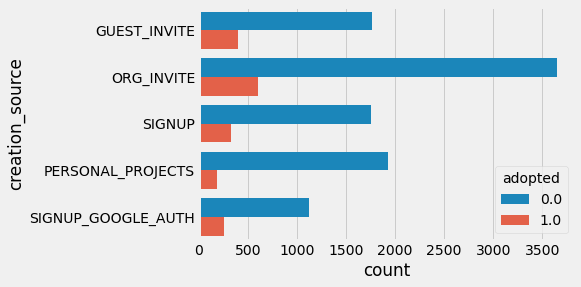

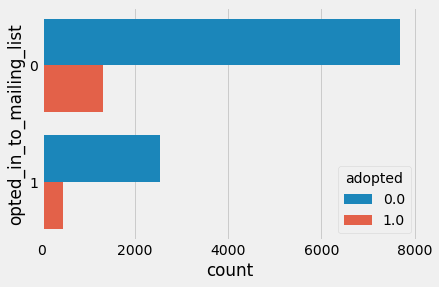

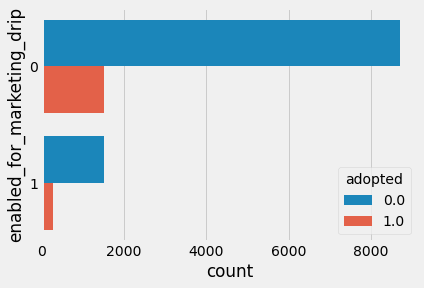

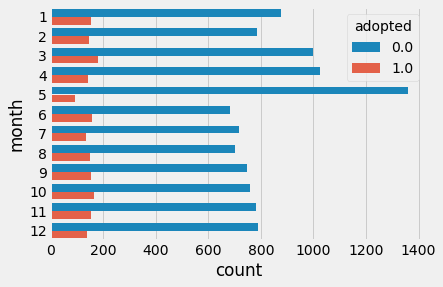

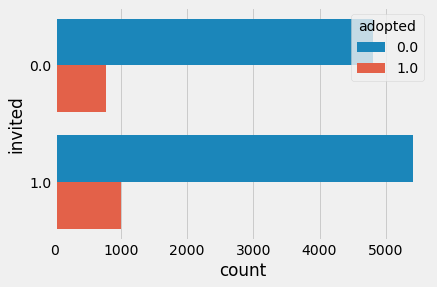

In [22]:
style.use('fivethirtyeight')
for col in ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'month', 'invited']:
    sns.countplot(y = col, hue = 'adopted', data = df_usr )
    plt.show()

There's some key information we can take away from these charts:
- There was a clear spike in signups during the month of May. We should collaborate with marketing to identify what drove this increase.
- Org Invite represents the largest signup route, and these users also tend to have a high adoption rate.
- There's a large imbalance between the number of users in and out of the mailing list and marketing drip, but there doesn't appear to be a significant difference in adoption rate between the two groups for either category.
- Invited users look to be noticeably more likely to adopt than those who found the service on their own.

In [23]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=None):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [24]:
df = df_usr.drop(['object_id', 'creation_time', 'name', 
                       'email', 'last_session_creation_time', 
                       'org_id','invited_by_user_id'], axis =1)
df = pd.get_dummies(df, columns = ['month','creation_source'] )
df_corr = get_top_abs_correlations(df)

df_corr = pd.DataFrame(df_corr).reset_index()
df_corr.rename(columns={"level_0": "feature_1", "level_1": "feature_2", 0:"correlation"}, 
           inplace = True)
df_corr = df_corr[(df_corr.feature_1 == 'adopted')][0:10]

print("Top 10 Absolute Correlations")
df_corr

Top 10 Absolute Correlations


,feature_1,feature_2,correlation
51,adopted,month_5,0.087237
52,adopted,users_in_org,0.085609
68,adopted,creation_source_PERSONAL_PROJECTS,0.080390
85,adopted,creation_source_GUEST_INVITE,0.046933
86,adopted,creation_source_SIGNUP_GOOGLE_AUTH,0.039675
87,adopted,month_6,0.031744
90,adopted,invited,0.026011
91,adopted,month_10,0.025746
92,adopted,month_4,0.023752
94,adopted,month_8,0.021842


May signup users and the number of users in org are the measures with the highest correlation with the adoption flag, followed by 3 of the creation source options.

In [25]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            12000 non-null  int64  
 1   enabled_for_marketing_drip          12000 non-null  int64  
 2   adopted                             12000 non-null  float64
 3   users_in_org                        12000 non-null  int64  
 4   invited                             12000 non-null  float64
 5   month_1                             12000 non-null  uint8  
 6   month_2                             12000 non-null  uint8  
 7   month_3                             12000 non-null  uint8  
 8   month_4                             12000 non-null  uint8  
 9   month_5                             12000 non-null  uint8  
 10  month_6                             12000 non-null  uint8  
 11  month_7                             12000

### Predictive Modeling

Before we begin modeling, we need to look at the distribution of adopted/not-adopted to check for a significant imbalance.

In [26]:
y = df['adopted']
X = df.drop(['adopted'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0.0: 7665, 1.0: 1335})
Testing target statistics: Counter({0.0: 2559, 1.0: 441})


We're looking at an approximate 85/15 split before not-adopted and adopted users. This imbalance could cause an issue in which our models default to selecting all negatives as that maximizes model accuracy. As such, we'll use RandomOverSampler from imbalanced learn to over-sample the minority (positive) class and thereby balance the dataset.

In [27]:
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0.0: 7665, 1.0: 7665})
Testing target statistics: Counter({0.0: 2559, 1.0: 441})


In [28]:
# Running the scaler on the rebalanced training set and original test set.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_res)
X_test = scaler.transform (X_test)

#### Logistic Regression

In [36]:
# Tuning penalty and C using RandomSearchCV
model = LogisticRegression()

penalty = ['none', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
LR_params = dict(penalty=penalty,C=c_values)

rand_search = GridSearchCV(model, LR_params, scoring='f1', n_jobs=-1)

rand_result = rand_search.fit(X_train, y_res)
print(rand_result.best_params_)
print(rand_result.best_score_)

{'C': 100, 'penalty': 'none'}
0.6464855516026192


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [44]:
# Fitting the Logistic Regression model to the training data using the optimal parameters found in the previous step
LogReg = LogisticRegression(penalty = 'none', C = 100, random_state = 42)
LogReg.fit(X_train,y_res)

# Using model to predict on the test set
y_pred_LR = LogReg.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [45]:
conf_matrix = confusion_matrix(y_test,y_pred_LR)
print(conf_matrix)

LogReg_acc = accuracy_score(y_test, y_pred_LR)
LogReg_f1=f1_score(y_test,y_pred_LR)
LogReg_roc_auc = roc_auc_score(y_test, y_pred_LR)

print('The accuracy score for Logistic Regression is '+ str(round(LogReg_acc, 4)))
print('The f1 score for Logistic Regression is ' + str(round(LogReg_f1, 4)))
print('The score for area under the ROC for Logistic Regression is ' + str(round(LogReg_roc_auc, 4)))

[[1141 1418]
 [ 121  320]]
The accuracy score for Logistic Regression is 0.487
The f1 score for Logistic Regression is 0.2937
The score for area under the ROC for Logistic Regression is 0.5858


#### Random Forest

In [38]:
# Random Forest
model = RandomForestClassifier()

max_features = list(range(1, 20))
max_depth = list(range(2, 9))
n_estimators = [10, 100, 1000]

RF_params = dict(max_features=max_features, n_estimators=n_estimators, max_depth=max_depth)

rand_search = GridSearchCV(model, RF_params, scoring='roc_auc', n_jobs=-1)

rand_result = rand_search.fit(X_train, y_res)
print(rand_result.best_params_)
print(rand_result.best_score_)

{'max_depth': 8, 'max_features': 1, 'n_estimators': 1000}
0.7734898125134835


In [40]:
# Fitting the Random Forest model to the training data using the optimal parameters found in the previous step
RF = RandomForestClassifier(max_features = 1, n_estimators = 1000, max_depth=8)
RF.fit(X_train,y_res)

# Using model to predict on the test set
y_pred_RF = RF.predict(X_test)

In [41]:
conf_matrix = confusion_matrix(y_test,y_pred_RF)
print(conf_matrix)

RF_acc = accuracy_score(y_test, y_pred_RF)
RF_f1=f1_score(y_test,y_pred_RF)
RF_roc_auc = roc_auc_score(y_test, y_pred_RF)

print('The accuracy score for Random Forest is '+ str(round(RF_acc, 4)))
print('The f1 score for Random Forest is ' + str(round(RF_f1, 4)))
print('The score for area under the ROC for Random Forest is ' + str(round(RF_roc_auc, 4)))

[[1560  999]
 [ 207  234]]
The accuracy score for Random Forest is 0.598
The f1 score for Random Forest is 0.2796
The score for area under the ROC for Random Forest is 0.5701


ROC-AUC Score: 0.6053987571321352


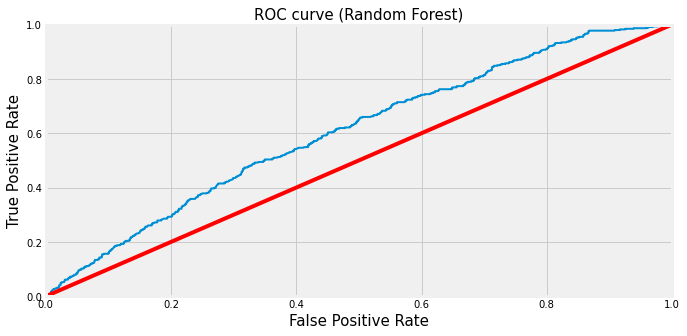

In [61]:
y_scores_RF = RF.predict_proba(X_test)
y_scores_RF = y_scores_RF[:,1]
auroc = roc_auc_score(y_test, y_scores_RF)
print("ROC-AUC Score:", auroc)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_RF)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.title('ROC curve (Random Forest)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

#### K-Nearest Neighbors

In [37]:
# K-Nearest-Neighbors
model = KNeighborsClassifier()

n_neighbors = list(range(1, 25))
metric = ['manhattan', 'euclidean']

KNN_params = dict(n_neighbors=n_neighbors,metric=metric)

rand_search = GridSearchCV(model, KNN_params, scoring='roc_auc', n_jobs=-1)

rand_result = rand_search.fit(X_train, y_res)
print(rand_result.best_params_)
print(rand_result.best_score_)

{'metric': 'manhattan', 'n_neighbors': 4}
0.8274997670300998


In [42]:
# Fitting the K-Nearest-Neighbors model to the training data using the optimal parameters found in the previous step
KNN = KNeighborsClassifier(n_neighbors = 4, metric='manhattan')
KNN.fit(X_train,y_res)

# Using model to predict on the test set
y_pred_KN = KNN.predict(X_test)

In [43]:
conf_matrix = confusion_matrix(y_test,y_pred_KN)
print(conf_matrix)

KNN_acc = accuracy_score(y_test, y_pred_KN)
KNN_f1=f1_score(y_test,y_pred_KN)
KNN_roc_auc = roc_auc_score(y_test, y_pred_KN)

print('The accuracy score for K-Nearest-Neighbors is '+ str(round(KNN_acc, 4)))
print('The f1 score for K-Nearest-Neighbors is ' + str(round(KNN_f1, 4)))
print('The score for area under the ROC for K-Nearest-Neighbors is ' + str(round(KNN_roc_auc, 4)))

[[1875  684]
 [ 300  141]]
The accuracy score for K-Nearest-Neighbors is 0.672
The f1 score for K-Nearest-Neighbors is 0.2227
The score for area under the ROC for K-Nearest-Neighbors is 0.5262


#### XGBoost

In [48]:
# XGBoost
model = XGBClassifier()

eta = [0.01, 0.05, 0.1, 0.2, 0.3]
max_depth = list(range(2, 10))
min_child_weight = list(range(1,6))
gamma = list(range(0,5))
subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
reg_alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

XGB_params = dict(eta=eta, max_depth=max_depth, min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, reg_alpha=reg_alpha)

rand_search = RandomizedSearchCV(model, XGB_params, n_iter=50, scoring='roc_auc', n_jobs=-1, random_state=42)

rand_result = rand_search.fit(X_train, y_res)
print(rand_result.best_params_)
print(rand_result.best_score_)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'subsample': 0.8, 'reg_alpha': 0.005, 'min_child_weight': 2, 'max_depth': 9, 'gamma': 1, 'eta': 0.3}
0.8579458480083094


In [49]:
# Fitting the XGBoost model to the training data using the optimal parameters found in the previous step
XGB = XGBClassifier(eta=0.3, gamma=1, max_depth=9, min_child_weight=2, reg_alpha=0.005, subsample=0.8, importance_type='weight')
XGB.fit(X_train, y_res)

# Using model to predict on the test set
y_pred_XGB = XGB.predict(X_test)

[11:39:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
conf_matrix = confusion_matrix(y_test,y_pred_XGB)
print(conf_matrix)

XGB_acc = accuracy_score(y_test, y_pred_XGB)
XGB_f1=f1_score(y_test,y_pred_XGB)
XGB_roc_auc = roc_auc_score(y_test, y_pred_XGB)

print('The accuracy score for XGBoost is '+ str(round(XGB_acc, 4)))
print('The f1 score for XGBoost is ' + str(round(XGB_f1, 4)))
print('The score for area under the ROC for XGBoost is ' + str(round(XGB_roc_auc, 4)))

[[1845  714]
 [ 285  156]]
The accuracy score for XGBoost is 0.667
The f1 score for XGBoost is 0.238
The score for area under the ROC for XGBoost is 0.5374


### Evaluating Model Performance

In [52]:
model_Labels = ['Logistic Regression','KNN', 'Random Forest', 'XGBoost']
acc_scores = [LogReg_acc, KNN_acc, RF_acc, XGB_acc]
f1_scores= [LogReg_f1, KNN_f1, RF_f1, XGB_f1]
ROC_Area = [LogReg_roc_auc, KNN_roc_auc, RF_roc_auc, XGB_roc_auc]

score_tab = pd.DataFrame(list(zip(model_Labels, acc_scores, f1_scores, ROC_Area)), 
               columns =['Algorithm', 'Accuracy', 'f1 Score', 'ROC-AUC score' ]) 

score_tab

,Algorithm,Accuracy,f1 Score,ROC-AUC score
0,Logistic Regression,0.487,0.293713,0.585750
1,KNN,0.672,0.222749,0.526218
2,Random Forest,0.598,0.279570,0.570113
3,XGBoost,0.667,0.237986,0.537363


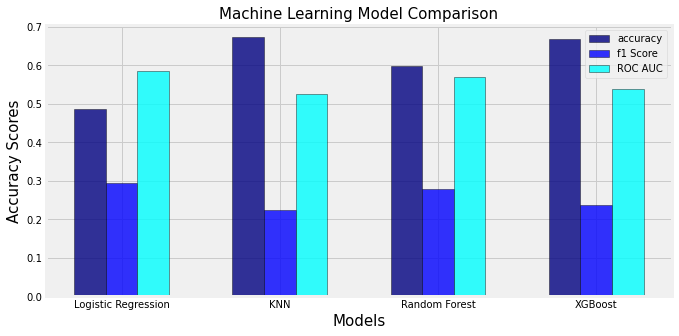

In [53]:
#plotting and comparing ROC-AUC train/test scores:
index=[1,2,3,4]
index_roc=[1.2,2.2,3.2,4.2]
index_acc=[0.8,1.8,2.8,3.8]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Accuracy Scores',fontsize=15)
plt.title('Machine Learning Model Comparison',fontsize=15)
_=plt.bar(index_acc, acc_scores, color='navy', alpha=0.8, label='accuracy', edgecolor='k', width=0.2)
_=plt.bar(index,f1_scores,color='b',alpha=0.8,label='f1 Score',edgecolor='k',width=0.2)
_=plt.bar(index_roc, ROC_Area,color='cyan',alpha=0.8,label='ROC AUC',edgecolor='k',width=0.2)
plt.xticks([1,2,3,4], model_Labels)
plt.legend()
plt.show()

### Conclusion

Unfortunately, none of our models were particularly effective at predicting adoption. None of them showed an f1-score greater than 0.3, and the area under the ROC curve were all close to the base case of 0.5. Analyzing the confusion matrices reveals that all models were susceptible to high rates of false negatives. In order to address this going forward, we might try to collect more data, generate more custom measures, or use a different re-sampling algorithm (e.g. SMOTE) for our minority over-sampling.

In terms of the current analysis, K-Nearest-Neighbors had the highest accuracy score but the lowest f1-score. Random Forest seems to offer the best overall performance across all 3 metrics, so this is the model we'll use to determine the most important predictors.

                              Features  Importance scores
5                              month_2           0.002897
4                              month_1           0.003455
6                              month_3           0.004035
10                             month_7           0.004139
15                            month_12           0.005910
11                             month_8           0.006069
12                             month_9           0.006356
7                              month_4           0.006714
14                            month_11           0.008299
13                            month_10           0.009641
17          creation_source_ORG_INVITE           0.014099
9                              month_6           0.014470
19              creation_source_SIGNUP           0.015719
3                              invited           0.017419
20  creation_source_SIGNUP_GOOGLE_AUTH           0.024736
16        creation_source_GUEST_INVITE           0.025936
1           en

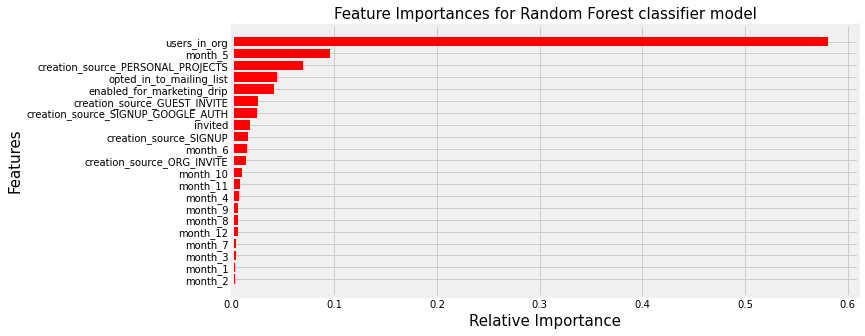

In [54]:
#Feature importances:
features = X
importances = list(RF.feature_importances_)
tab=pd.DataFrame(list(zip(X,importances)),columns =['Features', 'Importance scores']) 
tab = tab.sort_values(by=['Importance scores'], ascending=True)
print(tab)


#Visual comparison:
plt.figure(figsize=(10,5))
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
_=plt.barh(tab['Features'], tab['Importance scores'], align='center',color='r')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(tab['Features'])
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.show()

In order the data/process changes recommended above for improving model efficacy, we can also provide some baseline recommendations based on these feature importance results:

- The number of users in a particular user's organization is by far the biggest predictor of adoption/retention. This could be leveraged by focusing marketing efforts on larger enterprise companies, and by recommending more frequently that users invite other members in their team and broader organization.
- Perhaps surprisingly, not only did May result in a spike in signups, having a May registration date was also the 2nd strongest adoption predictor. It would be worth investigating whether a special promotion or marketing campaign was run that month, and if so, it could be advantageous to run it again.
- Personal Projects as an invitation source came in as the third strongest predictor, so it could be beneficial for these users to be targeted with more prominent means for asking outside users to help or collaborate on their projects.

While there is definite room for improvement for our prediction model, the above recommendations could, if implemented, still drive observable growth in adoption rates.